# W2. KADX 가격 데이터 분석

In [2]:
import os
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# DuckDB
# SQLite
# + Naver or other APIs

## [0] 매출데이터

### 1. 장보고

In [ ]:
# (1) 장보고

##  - CFMTN_YMD : 확정일자
##  - FDMT_PDLT_LGLS_CODE : 식자재품목대분류코드
##  - FDMT_PDLT_LGLS_NM : 식자재품목대분류명
##  - FDMT_PDLT_MDCL_CODE : 식자재품목중분류코드
##  - FDMT_PDLT_MDCL_NM : 식자재품목중분류명
##  - FDMT_PDLT_SMCS_CODE : 식자재품목소분류코드
##  - FDMT_PDLT_SMCS_NM : 식자재품목소분류명
##  - FDMT_PDLT_CODE : 식자재품목코드
##  - FDMT_PDLT_NM : 식자재품목명
##  - BRCD_INFO : 바코드정보
##  - TOT_SLE_QYT : 총판매수량

In [7]:
import duckdb
import pandas as pd

# DuckDB 연결
con = duckdb.connect()


query_selected = """
SELECT 
    *
FROM read_parquet('data/w2/jangbogo/jbg_parquet/TB_CL_MTH_SALES_YMD-F2015T2017-20210105_01n07.parquet')
"""

# 쿼리 실행
df_selected = con.execute(query_selected).df()
# df_filtered = con.execute(query_filtered).df()
# df_aggregated = con.execute(query_aggregated).df()

print("\n=== 상위 10개 카테고리 ===")
df_selected.head()


=== 상위 10개 카테고리 ===


,CFMTN_YMD,FDMT_PDLT_LGLS_CODE,FDMT_PDLT_LGLS_NM,FDMT_PDLT_MDCL_CODE,FDMT_PDLT_MDCL_NM,FDMT_PDLT_SMCS_CODE,FDMT_PDLT_SMCS_NM,FDMT_PDLT_CODE,FDMT_PDLT_NM,BRCD_INFO,TOT_SLE_QYT
0,20151118,1005.0,축산물,5579.0,수입 우육,5591.0,전각(불고기)/호주산,8254,우전각(불고기) /호주산,2982540000000,1.0
1,20160728,1001.0,가공상품,2039.0,냉동식품,5390.0,까스류,27295,미니돈까스 1KG/동원,8801047321576,1.0
2,20160728,0.0,None,0.0,None,0.0,None,8801047321576,미니돈까스1kg/동원,8801047321576,1.0
3,20160728,0.0,None,0.0,None,0.0,None,2982540000000,수입우육전각/불고기(호주산),2982540000000,1.0
4,20160728,1005.0,축산물,5579.0,수입 우육,5591.0,전각(불고기)/호주산,8254,우전각(불고기) /호주산,2982540000000,1.0


In [ ]:
# 특정 컬럼만 선택
query_selected = """
SELECT 
    CFMTN_YMD,
    FDMT_PDLT_LGLS_NM,
    FDMT_PDLT_NM,
    TOT_SLE_QYT
FROM read_parquet('data/w2/jangbogo/jbg_parquet/*.parquet')
"""

# 조건을 걸어서 필터링
query_filtered = """
SELECT *
FROM read_parquet('data/w2/jangbogo/jbg_parquet/*.parquet')
WHERE CFMTN_YMD >= '20230101'
"""

# 집계 쿼리
query_aggregated = """
SELECT 
    FDMT_PDLT_LGLS_NM,
    COUNT(*) as product_count,
    SUM(TOT_SLE_QYT) as total_sales
FROM read_parquet('data/w2/jangbogo/jbg_parquet/*.parquet')
GROUP BY FDMT_PDLT_LGLS_NM
ORDER BY total_sales DESC
LIMIT 10
"""

# 쿼리 실행
df_selected = con.execute(query_selected).df()
df_filtered = con.execute(query_filtered).df()
df_aggregated = con.execute(query_aggregated).df()

print("\n=== 상위 10개 카테고리 ===")
df_aggregated.head()

### 2. 온라인

In [10]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rc('font', family='AppleGothic')

In [11]:
# 2. 온라인쇼핑몰
df_online = pd.read_excel("./data/w2/실 구매 영수증 기반 온라인 쇼핑몰 연령별 매출 데이터.xlsx")

In [12]:
df_online['구매월'].unique()

array(['M202310'], dtype=object)

In [13]:
df_online.head()

,테이블순번,채널명,구매연도,구매분기,구매월,구매주차,구매주차일자,구매자연령,대분류,중분류,소분류,세분류,구매상품명,구매수량,구매금액
0,1,온라인쇼핑몰,Y2023,Q202304,M202310,W202340,20231002 ~ 20231008,40대,가공식품,제과,케익/빵,케익/빵,밀크앤허니 바질치즈치아바타샌드위치(780g/195g*4개입),1,13180
1,2,온라인쇼핑몰,Y2023,Q202304,M202310,W202340,20231002 ~ 20231008,40대,가공식품,소스/조미류,간장,간장,샘표 양조간장(701)(930ML),1,6400
2,3,온라인쇼핑몰,Y2023,Q202304,M202310,W202340,20231002 ~ 20231008,40대,가공식품,제과,초콜릿,초콜릿,허쉬 레귤러바 쿠키앤크림 40g 12개,1,12780
3,4,온라인쇼핑몰,Y2023,Q202304,M202310,W202340,20231002 ~ 20231008,40대,농산물,곡류,곡류,곡류,"미농 임금님 수라쌀 등급 상, 10kg, 1개",1,25900
4,5,온라인쇼핑몰,Y2023,Q202304,M202310,W202340,20231002 ~ 20231008,40대,농산물,두부/콩나물,두부,두부,"곰곰 콩두부, 500g, 8개",1,11830


In [14]:
df_online_gr = df_online.groupby(['구매자연령','대분류','소분류']).sum()[['구매수량','구매금액']]

In [15]:
df_online_gr.sort_values(by='구매금액', ascending=False).head(10)

구매수량      구매금액
구매자연령  대분류  소분류                    
40대    가공식품 건강기능식품    413  12851087
30대 이하 가공식품 건강기능식품    382   9562165
40대    농산물  과일        498   5446606
            채소        810   4530933
50대 이상 가공식품 건강기능식품    125   4210020
40대    가공식품 대용식(기타)   310   3668944
            비스켓/스낵    396   3477970
       농산물  곡류        139   3342500
30대 이하 농산물  채소        559   3231271
40대    가공식품 우유       1587   3018469

In [16]:
f1 = df_online['구매자연령'] == '30대 이하'
f2 = df_online['소분류'] == '건강기능식품'
df_online[f1&f2]['구매상품명'].value_counts()

구매상품명
하이뮨 프로틴 밸런스 음료 190ml 24개                           6
풍년보감 6년근 고려홍삼스틱 15G 200개                           4
스포츠리서치 트피플 스트렝스 오메가-3피쉬 오일 1250mg 소프트젤, 180정 1개    4
셀트리온 이너랩 액티브 활력 비타민B 콤플렉스 30g 60정 1개               4
씨스팡 혈관팔팔 칸탈로프 멜론 SOD 30정 2개                        4
                                                  ..
반품-미개봉 대상웰라이프 뉴케어 마이키즈 딸기맛 24개 150ml               1
일동후디스 하이뮨 프로틴 밸런스 캔 + 스틱 세트 380g 1세트               1
일동후디스(주) 후디스 초유밀 플러스 1 90g                         1
건강별곡 프리미엄 아누카사과 비오틴정 추출 분말 맥주효모, 1통, 60정           1
종근당건강 아임비타 멀티비타민 데일리 51g 2개                        1
Name: count, Length: 176, dtype: int64

In [17]:
f1 = df_online['구매자연령'] == '40대'
f2 = df_online['소분류'] == '건강기능식품'
df_online[f1&f2]['구매상품명'].value_counts()

구매상품명
솔가 철분 25 90정 1개                           6
바이탈라이즈 비타민B12 500 & 아연, 1박스, 100정         4
퍼니트 리얼 모로오렌지정 1개 45g                      4
키즈텐 루테인 비타민A 플러스 30p 30포 2개               4
울트라능력이 L아르기닌 오자 남성활력제 60정 36g 1개          4
                                         ..
뉴케어 구수한맛 완전 균형영양식 30개                     1
(주)뉴트리원 BB LAB 더 엘라스틴                     1
뉴트리모어 퓨어 비타민 D 2000IU 3.9g 30정 1개 30정     1
뉴케어 구수한맛 완전균형영양식 30개 200ml                1
뉴트리가든 프리미엄 프로바이오틱스 키즈 츄어블 유산균,60 정,1 개    1
Name: count, Length: 187, dtype: int64

In [18]:
f1 = df_online['구매자연령'] == '40대'
f2 = df_online['소분류'] == '과일'
df_online[f1&f2]['구매상품명'].value_counts()

구매상품명
프레시몬 칠레산 레몬, 1개, 1kg                  7
광식이농장 GAP 인증 완숙토마토 2kg 1개             7
스마트팜 완숙토마토 1kg 1개                     7
곰곰 친환경 대추방울 토마토 500g 1팩               6
셀렉트팜 못난이 골드사과얌(yam) 1.5kg (5-7입/봉)    6
                                     ..
만나다 미국산 오톰 크리스피 청포도 1개 450g           1
호재준 유기가공식품인증 아보카도(냉동) 400g 1개         1
다조은 칠레산 레몬 3개입, 350g, 1개              1
포유 더 맛있는 국내산 딸기 (냉동) 1kg 1개           1
스윗토 스테비아 완숙토마토, 1.5kg, 1개             1
Name: count, Length: 243, dtype: int64

In [19]:
# 
df_online['주차'] = df_online['구매주차'].apply(lambda x: x[-1])

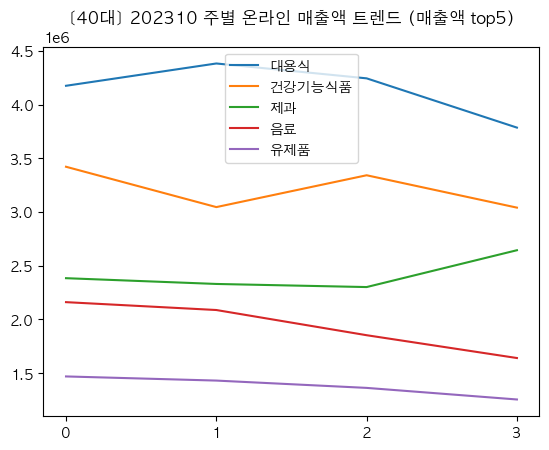

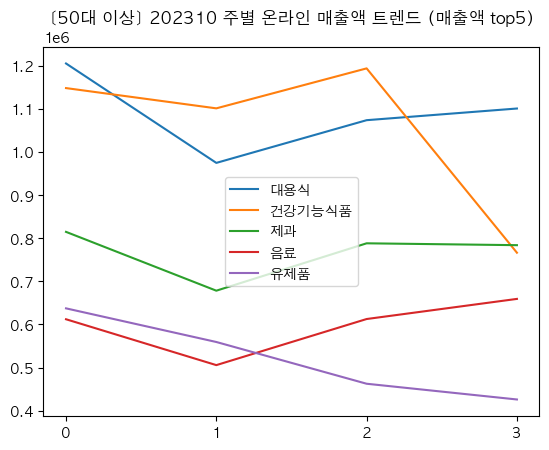

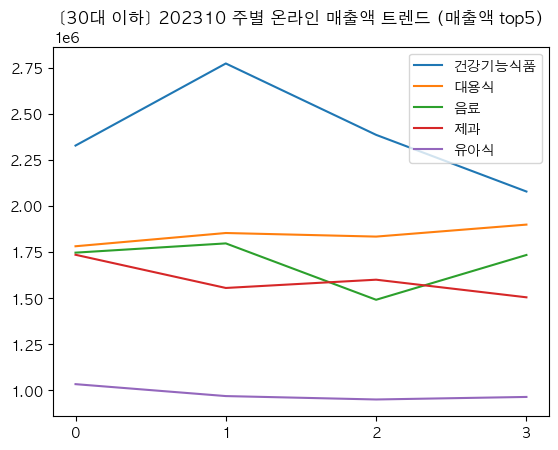

In [20]:
# 월트렌드
df_plot_base = df_online[['구매자연령','중분류','주차','구매금액']].groupby(['구매자연령','중분류','주차']).sum()

ages = list(set(map(lambda x: x[0], df_plot_base.index)))
dic_lines ={'30대 이하':'-', '50대 이상':'--', '40대':'-.'}

for idx in ages:
    df_plot = df_plot_base.loc[idx]
    line = dic_lines[idx]

    top5products = df_plot.reset_index().groupby(['중분류']).sum().sort_values(by='구매금액', ascending=False).head(5)
    products = top5products.index
    for idx2 in products:
        df_plot_tmp = df_plot.loc[idx2]
        x = list(df_plot_tmp.index)
        y = df_plot_tmp['구매금액'].to_list()
        label = idx2
        
        plt.plot(x, y, label=label)

    plt.title(f'[{idx}] 202310 주별 온라인 매출액 트렌드 (매출액 top5)')
    plt.legend()
    plt.show()

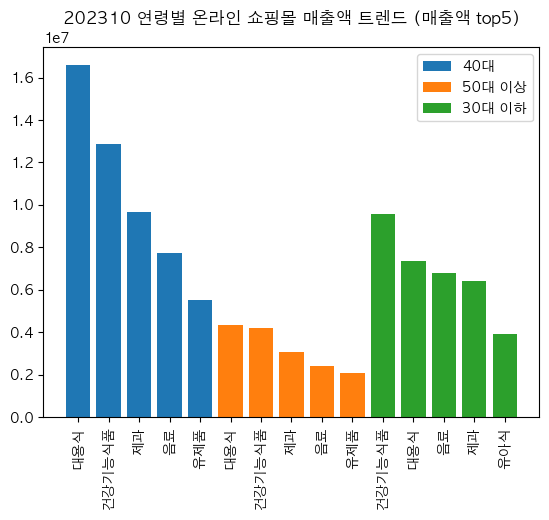

In [21]:
# 월트렌드
df_plot_base = df_online[['구매자연령','중분류','구매금액']].groupby(['구매자연령','중분류']).sum()

ages = list(set(map(lambda x: x[0], df_plot_base.index)))
dic_lines ={'30대 이하':'-', '50대 이상':'--', '40대':'-.'}

ls_p = []
ls_x = []
for i, idx in enumerate(ages):
    df_plot = df_plot_base.loc[idx]
    line = dic_lines[idx]

    top5products = df_plot.reset_index().groupby(['중분류']).sum().sort_values(by='구매금액', ascending=False).head(5)
    products = top5products.index
    
    x = np.arange(5) + (i)*5
    h = top5products['구매금액']

    ls_x += list(x)
    ls_p += list(products)

    plt.bar(x, h, label=idx)
plt.title(f'202310 연령별 온라인 쇼핑몰 매출액 트렌드 (매출액 top5)')
plt.legend()
plt.xticks(ls_x, ls_p, rotation=90)
plt.show()

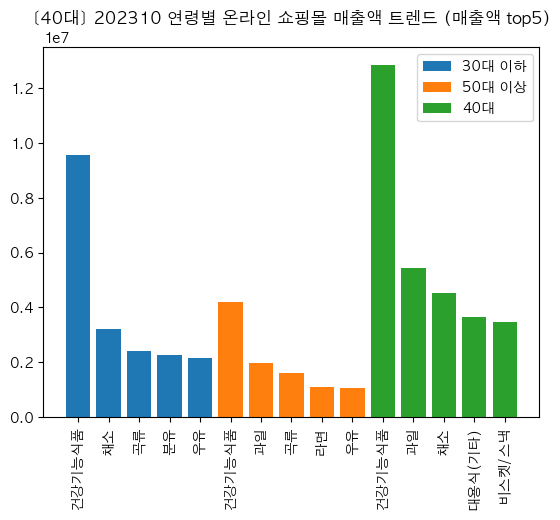

In [72]:
# 월트렌드
df_plot_base = df_online[['구매자연령','소분류','구매금액']].groupby(['구매자연령','소분류']).sum()

ages = list(set(map(lambda x: x[0], df_plot_base.index)))
dic_lines ={'30대 이하':'-', '50대 이상':'--', '40대':'-.'}

ls_p = []
ls_x = []
for i, idx in enumerate(ages):
    df_plot = df_plot_base.loc[idx]
    line = dic_lines[idx]

    top5products = df_plot.reset_index().groupby(['소분류']).sum().sort_values(by='구매금액', ascending=False).head(5)
    products = top5products.index
    
    x = np.arange(5) + (i)*5
    h = top5products['구매금액']

    ls_x += list(x)
    ls_p += list(products)

    plt.bar(x, h, label=idx)
plt.title(f'[{idx}] 202310 연령별 온라인 쇼핑몰 매출액 트렌드 (매출액 top5)')
plt.legend()
plt.xticks(ls_x, ls_p, rotation=90)
plt.show()

#### 건강기능식품?

In [65]:
f1 = df_online['구매자연령'] == '40대'
f2 = df_online['소분류'] == '건강기능식품'
df_online[f1&f2]['구매상품명'].value_counts().iloc[:10]

구매상품명
솔가 철분 25 90정 1개                        6
바이탈라이즈 비타민B12 500 & 아연, 1박스, 100정      4
퍼니트 리얼 모로오렌지정 1개 45g                   4
키즈텐 루테인 비타민A 플러스 30p 30포 2개            4
울트라능력이 L아르기닌 오자 남성활력제 60정 36g 1개       4
정관장 홍삼정 에브리타임 밸런스 10ml 30포 + 쇼핑백 1개    4
키움정 성장발육 건강기능식품, 240정, 1개              4
[풍기인삼농협 직영] 황풍정 6년근 홍삼분말 120g, 1개      4
일동제약 비오비타 키즈, 60g, 2개                  4
[온라인단독]그린몬스터 다이어트 6IN1 녹차카테킨1000+      4
Name: count, dtype: int64

In [67]:
f1 = df_online['구매자연령'] == '40대'
f2 = df_online['중분류'] == '대용식'
df_online[f1&f2]['구매상품명'].value_counts().iloc[:10]

구매상품명
(주)오뚜기 오동통면 120g x 5개입    11
농심 안성탕면(5개)               10
풀무원 통밀 또띠아 150g 1개         9
오뚜기 진라면 컵 순한맛(6개)          9
농심 김치 사발면(6개)              9
오뚜기 진라면 순한맛(5개)            8
농심 올리브 짜파게티 5개입            8
비노 스파게티, 500g, 6개          8
농심 신라면 소컵(6개)              7
농심 신라면 5개                  7
Name: count, dtype: int64

In [69]:
f1 = df_online['구매자연령'] == '30대 이하'
f2 = df_online['중분류'] == '대용식'
df_online[f1&f2]['구매상품명'].value_counts().iloc[:10]

구매상품명
오뚜기 참깨라면(4입)                                       7
곰곰 한입 떡갈비 (냉동), 564g, 1개                           6
농심 신라면(5개)                                         5
오뚜기 맛있는 오뚜기밥 210g 24개                              5
오뚜기 맛있는 오뚜기밥, 210g, 24개                            5
푸딩팩토리 매콤 돼지껍데기 300g 2개                             5
오뚜기 진라면 매운맛 120g*5                                 5
농심 올리브 짜파게티 10개입                                   5
프레쉬팜 리코타 발사믹 샐러드 160g +  카프레제 이탈리안 샐러트 160g 1세트    4
장충동왕족발 쫄깃한편육 1030g 1개                              4
Name: count, dtype: int64

---
## CSV to Parquet

In [74]:
import pandas as pd
import os
from tqdm import tqdm
import glob

# 입력 및 출력 디렉토리 설정
input_dir = 'data/w2/jangbogo'
output_dir = 'data/w2/jangbogo/parquet'

# 출력 디렉토리가 없으면 생성
os.makedirs(output_dir, exist_ok=True)

# CSV 파일 목록 가져오기
# csv_files = glob.glob(os.path.join(input_dir, '*.csv'))
csv_files = ['data/w2/jangbogo/TB_CL_MTH_SALES_YMD_20210728_11n.csv',
'data/w2/jangbogo/TB_CL_MTH_SALES_YMD_20231006_03.csv',
'data/w2/jangbogo/TB_CL_MTH_SALES_YMD-F2015T2017-20210105_01n03.csv',
'data/w2/jangbogo/TB_CL_MTH_SALES_YMD-F2015T2017-20210105_01n07.csv']

In [76]:
def read_csv_with_encoding(file_path):
    """여러 인코딩을 시도하여 CSV 파일 읽기"""
    encodings = ['cp949', 'utf-8', 'euc-kr']
    
    for encoding in encodings:
        try:
            df = pd.read_csv(file_path, encoding=encoding, low_memory=False)
            print(f"Successfully read with {encoding} encoding")
            return df
        except UnicodeDecodeError:
            continue
    
    raise ValueError(f"Could not read {file_path} with any of these encodings: {encodings}")
# 변환 성공/실패 카운트
success_count = 0
failed_files = []

# 각 파일별로 변환
for csv_file in tqdm(csv_files, desc="Converting files"):
    try:
        # 출력 파일명 생성
        output_file = os.path.basename(csv_file).replace('.csv', '.parquet')
        output_path = os.path.join(output_dir, output_file)
        
        print(f"\nProcessing {csv_file}")
        
        # 여러 인코딩을 시도하여 파일 읽기
        df = read_csv_with_encoding(csv_file)
        
        # Parquet 파일로 저장
        df.to_parquet(output_path, compression='snappy')
        
        # 메모리 사용량 출력
        memory_usage = df.memory_usage(deep=True).sum() / 1024 / 1024  # MB 단위
        print(f"Memory usage: {memory_usage:.2f} MB")
        print(f"Saved to {output_path}")
        
        success_count += 1
        
    except Exception as e:
        print(f"\nError converting {csv_file}: {str(e)}")
        failed_files.append((csv_file, str(e)))
        continue

# 결과 보고
print("\n=== Conversion Summary ===")
print(f"Total files processed: {len(csv_files)}")
print(f"Successfully converted: {success_count}")
print(f"Failed conversions: {len(failed_files)}")

if failed_files:
    print("\nFailed files:")
    for file, error in failed_files:
        print(f"- {file}: {error}")

Converting files:   0%|          | 0/4 [00:00<?, ?it/s]


Processing data/w2/jangbogo/TB_CL_MTH_SALES_YMD_20210728_11n.csv
Successfully read with utf-8 encoding


Converting files:  25%|██▌       | 1/4 [00:03<00:11,  3.69s/it]

Memory usage: 1120.59 MB
Saved to data/w2/jangbogo/parquet/TB_CL_MTH_SALES_YMD_20210728_11n.parquet

Processing data/w2/jangbogo/TB_CL_MTH_SALES_YMD_20231006_03.csv
Successfully read with cp949 encoding


Converting files:  50%|█████     | 2/4 [00:08<00:08,  4.11s/it]

Memory usage: 1125.80 MB
Saved to data/w2/jangbogo/parquet/TB_CL_MTH_SALES_YMD_20231006_03.parquet

Processing data/w2/jangbogo/TB_CL_MTH_SALES_YMD-F2015T2017-20210105_01n03.csv
Successfully read with cp949 encoding


Converting files:  75%|███████▌  | 3/4 [00:15<00:05,  5.65s/it]

Memory usage: 1700.15 MB
Saved to data/w2/jangbogo/parquet/TB_CL_MTH_SALES_YMD-F2015T2017-20210105_01n03.parquet

Processing data/w2/jangbogo/TB_CL_MTH_SALES_YMD-F2015T2017-20210105_01n07.csv
Successfully read with cp949 encoding


Converting files: 100%|██████████| 4/4 [00:23<00:00,  5.78s/it]

Memory usage: 1698.91 MB
Saved to data/w2/jangbogo/parquet/TB_CL_MTH_SALES_YMD-F2015T2017-20210105_01n07.parquet

=== Conversion Summary ===
Total files processed: 4
Successfully converted: 4
Failed conversions: 0


---

---
## [1] 네이버 검색어

In [13]:
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.chrome.options import Options
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# import time

# def get_shopping_insight_keywords(category_code="50000000", age_code="30", gender_code="all"):
#     chrome_options = Options()
#     chrome_options.add_argument("--headless")
#     chrome_options.add_argument("--disable-gpu")
#     driver = webdriver.Chrome(options=chrome_options)

#     driver.get("https://datalab.naver.com/shoppingInsight/sCategory.naver")
#     wait = WebDriverWait(driver, 10)

#     # 날짜 선택 (최근 월 기본)
#     time.sleep(2)

#     # 성별 선택
#     gender_selector = f"input[name='gender'][value='{gender_code}']"
#     wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, gender_selector))).click()

#     # 연령 선택
#     age_selector = f"input[name='age'][value='{age_code}']"
#     wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, age_selector))).click()

#     # 대분류 카테고리 선택 (1차)
#     driver.execute_script(f"selectCategoryDepth('category1', '{category_code}', 1);")
#     time.sleep(2)

#     # 검색 버튼 클릭
#     wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "a.btn_search"))).click()
#     time.sleep(3)

#     # 키워드 크롤링
#     keywords = []
#     keyword_elements = driver.find_elements(By.CSS_SELECTOR, ".rank_top1000_list span.txt")
#     for elem in keyword_elements:
#         keyword = elem.text.strip()
#         if keyword:
#             keywords.append(keyword)

#     driver.quit()
#     return keywords

# # 🎯 실행
# food_keywords = get_shopping_insight_keywords(category_code="50000000", age_code="30")
# leisure_keywords = get_shopping_insight_keywords(category_code="50000003", age_code="30")

# print("📌 30대 식품 인기 키워드 Top 20:")
# print(food_keywords[:20])

# print("\n📌 30대 레저 인기 키워드 Top 20:")
# print(leisure_keywords[:20])



In [14]:
import requests
import json
import pandas as pd
from datetime import datetime, timedelta

## env
from dotenv import load_dotenv
import os


# 네이버 API 인증 정보
load_dotenv()  # .env 파일 로드
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

# 헤더 설정
headers = {
    "X-Naver-Client-Id": client_id,
    "X-Naver-Client-Secret": client_secret,
    "Content-Type": "application/json"
}


In [15]:
def get_shopping_insight(startDate, endDate, category, timeUnit='date', device='pc', gender='f', ages=['20', '30']):
    url = "https://openapi.naver.com/v1/datalab/shopping/categories"
    
    body = {
        "startDate": startDate,
        "endDate": endDate,
        "timeUnit": timeUnit,
        "category": category,
        "device": device,
        "gender": gender,
        "ages": ages
    }
    
    response = requests.post(url, headers=headers, data=json.dumps(body))
    
    if response.status_code == 200:
        data = response.json()
        # DataFrame으로 변환
        results = []
        for item in data['results']:
            for datum in item['data']:
                results.append({
                    'date': datum['period'],
                    'category': item['title'],
                    'ratio': datum['ratio']
                })
        return pd.DataFrame(results)
    else:
        print(f"Error: {response.status_code}")
        print(response.text)
        return None

# 사용 예시
category = [
    {"name": "건강기능식품", "param": ["50000000"]},
    # {"name": "화장품/미용", "param": ["50000002"]}
]

df_shopping = get_shopping_insight(
    startDate="2024-01-01",
    endDate="2024-03-20",
    category=category
)

In [16]:
df_shopping

,date,category,ratio
0,2024-01-01,건강기능식품,30.97558
1,2024-01-02,건강기능식품,67.06818
2,2024-01-03,건강기능식품,73.68396
3,2024-01-04,건강기능식품,72.52999
4,2024-01-05,건강기능식품,62.71550
...,...,...,...
75,2024-03-16,건강기능식품,33.71913
76,2024-03-17,건강기능식품,42.70608
77,2024-03-18,건강기능식품,98.87706
78,2024-03-19,건강기능식품,93.67845


In [17]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from tqdm import tqdm
import time
plt.rcParams['font.family'] = 'AppleGothic'

## env
from dotenv import load_dotenv
import os


class NaverDataLabAnalyzer:
    def __init__(self, client_id, client_secret):
        self.client_id = client_id
        self.client_secret = client_secret
        self.headers = {
            "X-Naver-Client-Id": client_id,
            "X-Naver-Client-Secret": client_secret,
            "Content-Type": "application/json"
        }
        
        # 분야별 키워드 설정
        self.categories = {
            "쇼핑": ["온라인쇼핑", "마트", "편의점", "백화점"],
            "음식": ["맛집", "배달음식", "레스토랑", "카페"],
            "여가": ["영화", "여행", "운동", "취미"],
            "뷰티": ["화장품", "스킨케어", "메이크업", "헤어"],
            "테크": ["스마트폰", "노트북", "가전제품", "IT"]
        }
        
        # 연령대 설정
        self.age_groups = ["1","2","3","4","5","6"]



    def get_trend_data(self, keywords, start_date, end_date, age=None, timeUnit="date"):
        """데이터랩 검색 트렌드 API 호출"""
        url = "https://openapi.naver.com/v1/datalab/search"
        
        body = {
            "startDate": start_date,
            "endDate": end_date,
            "timeUnit": timeUnit,
            "keywordGroups": [
                {
                    "groupName": keyword,
                    "keywords": [keyword]
                } for keyword in keywords[:5]  # API 제한으로 5개까지만
            ]
        }
        
        if age:
            body["ages"] = [age]
        
        try:
            response = requests.post(url, headers=self.headers, data=json.dumps(body))
            if response.status_code == 200:
                return response.json()
            else:
                print(f"API Error: {response.status_code}")
                print(f"Response: {response.text}")
                return None
        except Exception as e:
            print(f"Exception: {str(e)}")
            return None

    def analyze_trends(self, start_date, end_date, save_path="trend_analysis"):
        """전체 트렌드 분석 실행"""
        all_results = []
        
        # 진행 상황 표시를 위한 전체 작업 수 계산
        total_iterations = len(self.categories) * len(self.age_groups)
        
        with tqdm(total=total_iterations) as pbar:
            # 각 카테고리와 연령대별로 분석
            for category_name, keywords in self.categories.items():
                for age in self.age_groups:
                    result = self.get_trend_data(keywords, start_date, end_date, age)
                    
                    if result and 'results' in result:
                        for item in result['results']:
                            for data in item['data']:
                                all_results.append({
                                    'date': data['period'],
                                    'category': category_name,
                                    'keyword': item['title'],
                                    'age': age,
                                    'ratio': data['ratio']
                                })
                    
                    pbar.update(1)
                    time.sleep(1)  # API 호출 제한 고려
        
        # 결과를 DataFrame으로 변환
        df = pd.DataFrame(all_results)
        
        # 결과 저장 및 분석
        self.save_and_visualize_results(df, save_path)
        
        return df

    def save_and_visualize_results(self, df, save_path):
        """결과 저장 및 시각화"""
        # 결과 저장
        os.makedirs(save_path, exist_ok=True)
        df.to_csv(f"{save_path}/trend_analysis.csv", encoding='utf-8-sig', index=False)
        
        # 1. 연령대별 관심 키워드 히트맵
        plt.figure(figsize=(15, 8))
        pivot_age = df.pivot_table(
            values='ratio', 
            index='keyword', 
            columns='age', 
            aggfunc='mean'
        )
        sns.heatmap(pivot_age, annot=True, fmt='.1f', cmap='YlOrRd')
        plt.title('연령대별 키워드 관심도')
        plt.tight_layout()
        plt.savefig(f"{save_path}/age_keyword_heatmap.png")
        plt.close()
        
        # 2. 시계열 트렌드 (카테고리별)
        plt.figure(figsize=(15, 8))
        for category in df['category'].unique():
            category_data = df[df['category'] == category].groupby('date')['ratio'].mean()
            plt.plot(category_data.index, category_data.values, label=category, marker='o')
        plt.title('카테고리별 트렌드 변화')
        plt.xlabel('날짜')
        plt.ylabel('검색 비중')
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f"{save_path}/category_trends.png")
        plt.close()
        
        # 3. 주요 통계 분석
        summary = pd.DataFrame({
            'category': df.groupby('category')['ratio'].mean().sort_values(ascending=False),
            'age_preference': df.groupby('age')['ratio'].mean().sort_values(ascending=False),
            'top_keywords': df.groupby('keyword')['ratio'].mean().sort_values(ascending=False)
        })
        summary.to_csv(f"{save_path}/trend_summary.csv", encoding='utf-8-sig')

def main():
    # API 인증 정보
    load_dotenv()  # .env 파일 로드
    client_id = os.getenv("CLIENT_ID")
    client_secret = os.getenv("CLIENT_SECRET")
    
    # 분석 기간 설정
    # end_date = datetime.now()
    # start_date = end_date - timedelta(days=30)  # 최근 30일
    end_date = datetime.strptime("2024-03-20", "%Y-%m-%d")
    start_date = datetime.strptime("2024-01-01", "%Y-%m-%d")

    analyzer = NaverDataLabAnalyzer(client_id, client_secret)
    
    # 분석 실행
    df = analyzer.analyze_trends(
        start_date.strftime("%Y-%m-%d"),
        end_date.strftime("%Y-%m-%d"),
        save_path="naver_trend_analysis"
    )
    
    # 결과 요약 출력
    print("\n=== 분석 결과 요약 ===")
    print("\n상위 5개 키워드:")
    print(df.groupby('keyword')['ratio'].mean().sort_values(ascending=False).head())
    
    print("\n연령대별 관심도:")
    print(df.groupby('age')['ratio'].mean().sort_values(ascending=False))
    
    print("\n카테고리별 관심도:")
    print(df.groupby('category')['ratio'].mean().sort_values(ascending=False))
    return df

if __name__ == "__main__":
    df = main()

100%|██████████| 30/30 [00:39<00:00,  1.30s/it]



=== 분석 결과 요약 ===

상위 5개 키워드:
keyword
노트북    66.556915
헤어     60.312965
영화     49.705388
편의점    48.842041
카페     48.810402
Name: ratio, dtype: float64

연령대별 관심도:
age
3    24.170803
4    22.561741
5    21.424914
2    20.679970
6    20.373080
1    19.571931
Name: ratio, dtype: float64

카테고리별 관심도:
category
뷰티    34.534544
테크    20.591487
쇼핑    20.491934
음식    19.302005
여가    13.001277
Name: ratio, dtype: float64


In [18]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from tqdm import tqdm
import time
from dotenv import load_dotenv
import os
plt.rcParams['font.family'] = 'AppleGothic'

class NaverYearlyTrendAnalyzer:
    def __init__(self, client_id, client_secret):
        self.client_id = client_id
        self.client_secret = client_secret
        self.headers = {
            "X-Naver-Client-Id": client_id,
            "X-Naver-Client-Secret": client_secret,
            "Content-Type": "application/json"
        }

    def get_trend_data(self, keywords, start_date, end_date, timeUnit="month"):
        """데이터랩 검색 트렌드 API 호출"""
        url = "https://openapi.naver.com/v1/datalab/search"
        
        body = {
            "startDate": start_date,
            "endDate": end_date,
            "timeUnit": timeUnit,
            "keywordGroups": [
                {
                    "groupName": keyword,
                    "keywords": [keyword]
                } for keyword in keywords
            ]
        }
        
        try:
            response = requests.post(url, headers=self.headers, data=json.dumps(body))
            if response.status_code == 200:
                return response.json()
            else:
                print(f"API Error: {response.status_code}")
                print(f"Response: {response.text}")
                return None
        except Exception as e:
            print(f"Exception: {str(e)}")
            return None

    def analyze_yearly_trends(self, keywords, start_year, end_year, save_path="yearly_trend_analysis"):
        """연도별 트렌드 분석"""
        all_results = []
        
        # 각 연도별 데이터 수집
        for year in tqdm(range(start_year, end_year + 1), desc="연도별 데이터 수집"):
            start_date = f"{year}-01-01"
            end_date = f"{year}-12-31"
            
            result = self.get_trend_data(keywords, start_date, end_date)
            
            if result and 'results' in result:
                for item in result['results']:
                    for data in item['data']:
                        all_results.append({
                            'date': data['period'],
                            'keyword': item['title'],
                            'ratio': data['ratio'],
                            'year': year
                        })
            
            time.sleep(1)  # API 호출 제한 고려
        
        # 결과를 DataFrame으로 변환
        df = pd.DataFrame(all_results)
        if not df.empty:
            df['date'] = pd.to_datetime(df['date'])
            df['month'] = df['date'].dt.month
            
            # 결과 저장 및 시각화
            self.save_and_visualize_yearly_results(df, keywords, save_path)
        
        return df

    def save_and_visualize_yearly_results(self, df, keywords, save_path):
        """결과 저장 및 시각화"""
        os.makedirs(save_path, exist_ok=True)
        
        # 데이터 저장
        df.to_csv(f"{save_path}/yearly_trend_analysis.csv", encoding='utf-8-sig', index=False)
        
        # 1. 연도별 트렌드 라인 그래프
        plt.figure(figsize=(15, 8))
        for keyword in keywords:
            keyword_data = df[df['keyword'] == keyword]
            for year in keyword_data['year'].unique():
                year_data = keyword_data[keyword_data['year'] == year]
                plt.plot(year_data['month'], year_data['ratio'], 
                        label=f'{keyword} ({year})',
                        marker='o')
        
        plt.title('연도별 키워드 검색 트렌드')
        plt.xlabel('월')
        plt.ylabel('검색 비중')
        plt.grid(True)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(f"{save_path}/yearly_trends_line.png", bbox_inches='tight')
        plt.close()
        
        # 2. 히트맵
        plt.figure(figsize=(12, 8))
        pivot_data = df.pivot_table(
            values='ratio',
            index='year',
            columns='month',
            aggfunc='mean'
        )
        sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='YlOrRd')
        plt.title('연도/월별 검색 트렌드 히트맵')
        plt.tight_layout()
        plt.savefig(f"{save_path}/yearly_trends_heatmap.png")
        plt.close()
        
        # 3. 연도별 평균 검색량 막대 그래프
        plt.figure(figsize=(12, 6))
        yearly_avg = df.groupby(['year', 'keyword'])['ratio'].mean().unstack()
        yearly_avg.plot(kind='bar', width=0.8)
        plt.title('연도별 평균 검색량')
        plt.xlabel('연도')
        plt.ylabel('평균 검색 비중')
        plt.legend(title='키워드', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig(f"{save_path}/yearly_trends_bar.png", bbox_inches='tight')
        plt.close()

def main():
    # API 인증 정보
    load_dotenv()
    client_id = os.getenv("CLIENT_ID")
    client_secret = os.getenv("CLIENT_SECRET")
    
    # 분석할 키워드와 기간 설정
    keywords = ["온라인쇼핑", "배달음식"]  # 분석하고 싶은 키워드 입력
    start_year = 2022
    end_year = 2024
    
    analyzer = NaverYearlyTrendAnalyzer(client_id, client_secret)
    
    # 분석 실행
    df = analyzer.analyze_yearly_trends(
        keywords,
        start_year,
        end_year,
        save_path="naver_yearly_trend_analysis"
    )
    
    # 결과 요약 출력
    if df is not None and not df.empty:
        print("\n=== 분석 결과 요약 ===")
        print("\n키워드별 평균 검색량:")
        print(df.groupby('keyword')['ratio'].mean().sort_values(ascending=False))
        
        print("\n연도별 평균 검색량:")
        print(df.groupby(['year', 'keyword'])['ratio'].mean().unstack())
    
    return df

if __name__ == "__main__":
    df = main()

연도별 데이터 수집: 100%|██████████| 3/3 [00:03<00:00,  1.12s/it]



=== 분석 결과 요약 ===

키워드별 평균 검색량:
keyword
배달음식     79.819138
온라인쇼핑     4.039849
Name: ratio, dtype: float64

연도별 평균 검색량:
keyword       배달음식     온라인쇼핑
year                        
2022     72.009603  2.989915
2023     83.276169  4.193843
2024     84.171643  4.935787


<Figure size 1200x600 with 0 Axes>

In [19]:
df

,date,keyword,ratio,year,month
0,2022-01-01,온라인쇼핑,3.28236,2022,1
1,2022-02-01,온라인쇼핑,2.91355,2022,2
2,2022-03-01,온라인쇼핑,3.74195,2022,3
3,2022-04-01,온라인쇼핑,3.35896,2022,4
4,2022-05-01,온라인쇼핑,3.61996,2022,5
...,...,...,...,...,...
67,2024-08-01,배달음식,100.00000,2024,8
68,2024-09-01,배달음식,77.77911,2024,9
69,2024-10-01,배달음식,72.41108,2024,10
70,2024-11-01,배달음식,72.58619,2024,11


In [20]:
for kwd in df['keyword'].unique():
    f1 = df['keyword'] == kwd
    df_to_plot = df[f1]
    
    df_to_plot['x'] = (df_to_plot['year']-2022)*12 + df_to_plot['month']
    x = df_to_plot['x']
    y = df_to_plot['ratio']

    # plt.plot(x, y)
    break

/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_1840/2485509840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_plot['x'] = (df_to_plot['year']-2022)*12 + df_to_plot['month']


In [26]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from tqdm import tqdm
import time
from dotenv import load_dotenv
import os
plt.rcParams['font.family'] = 'AppleGothic'

class NaverTrendAnalyzer:
    def __init__(self, client_id, client_secret):
        self.client_id = client_id
        self.client_secret = client_secret
        self.headers = {
            "X-Naver-Client-Id": client_id,
            "X-Naver-Client-Secret": client_secret,
            "Content-Type": "application/json"
        }
        
        # 연령대 설정
        self.age_groups = ["1", "2", "3", "4", "5", "6"]
        self.age_mapping = {
            "1": "10대",
            "2": "20대",
            "3": "30대",
            "4": "40대",
            "5": "50대",
            "6": "60대"
        }

    def get_trend_data(self, keywords, start_date, end_date, age, timeUnit="month"):
        """데이터랩 검색 트렌드 API 호출"""
        url = "https://openapi.naver.com/v1/datalab/search"
        
        body = {
            "startDate": start_date,
            "endDate": end_date,
            "timeUnit": timeUnit,
            "ages": [age],
            "keywordGroups": [
                {
                    "groupName": keyword,
                    "keywords": [keyword]
                } for keyword in keywords
            ]
        }
        
        try:
            response = requests.post(url, headers=self.headers, data=json.dumps(body))
            if response.status_code == 200:
                return response.json()
            else:
                print(f"API Error: {response.status_code}")
                print(f"Response: {response.text}")
                return None
        except Exception as e:
            print(f"Exception: {str(e)}")
            return None

    def analyze_trends(self, keywords, start_year, end_year, save_path="trend_analysis"):
        """트렌드 분석"""
        all_results = []

        for year in range(start_year, end_year + 1):
            for month in range(12):
                start_date = f"{start_year}-01"
                end_date = f"{start_year}-12"

            # 전체 기간 설정
            for month in range()
            start_date = f"{start_year}-{start_month}-01"
            end_date = f"{end_year}-{month}-31"
            
            # 연령대별, 키워드별 데이터 수집
            total_iterations = len(self.age_groups) * len(keywords)
            with tqdm(total=total_iterations, desc="데이터 수집 중") as pbar:
                for age in self.age_groups:
                    result = self.get_trend_data(keywords, start_date, end_date, age)
                    
                    if result and 'results' in result:
                        for item in result['results']:
                            for data in item['data']:
                                all_results.append({
                                    'date': data['period'],
                                    'keyword': item['title'],
                                    'age': self.age_mapping[age],
                                    'ratio': data['ratio']
                                })
                    
                    pbar.update(1)
                    time.sleep(1)  # API 호출 제한 고려
        
        # 결과를 DataFrame으로 변환
        df = pd.DataFrame(all_results)
        if not df.empty:
            # 날짜 처리
            df['date'] = pd.to_datetime(df['date'])
            df['year'] = df['date'].dt.year
            df['month'] = df['date'].dt.month
            
            # 결과 저장
            os.makedirs(save_path, exist_ok=True)
            df.to_csv(f"{save_path}/monthly_trend_by_age.csv", encoding='utf-8-sig', index=False)
            
            # 피벗 테이블 생성 및 저장
            pivot_monthly = pd.pivot_table(
                df,
                values='ratio',
                index=['year', 'month', 'keyword'],
                columns='age',
                aggfunc='mean'
            ).reset_index()
            
            # 월을 2자리 문자열로 변환
            pivot_monthly['month'] = pivot_monthly['month'].apply(lambda x: f"{x:02d}")
            # year와 month를 조합하여 yyyy-mm 형식의 새로운 컬럼 생성
            pivot_monthly['period'] = pivot_monthly['year'].astype(str) + '-' + pivot_monthly['month']
            
            # 컬럼 순서 재정렬
            cols = ['period', 'keyword'] + list(self.age_mapping.values())
            pivot_monthly = pivot_monthly[cols]
            
            # 피벗 테이블 저장
            pivot_monthly.to_csv(f"{save_path}/monthly_trend_pivot.csv", encoding='utf-8-sig', index=False)
        
        return df, pivot_monthly

def main():
    # API 인증 정보
    load_dotenv()
    client_id = os.getenv("CLIENT_ID")
    client_secret = os.getenv("CLIENT_SECRET")
    
    # 분석할 키워드와 기간 설정
    keywords = ["온라인쇼핑", "배달음식"]
    start_year = 2022
    end_year = 2024
    
    analyzer = NaverTrendAnalyzer(client_id, client_secret)
    
    # 분석 실행
    df, pivot_df = analyzer.analyze_trends(
        keywords,
        start_year,
        end_year,
        save_path="naver_trend_analysis"
    )
    
    # 결과 출력
    if df is not None and not df.empty:
        print("\n=== 전체 데이터 미리보기 ===")
        print(df.head())
        print("\n=== 피벗 테이블 미리보기 ===")
        print(pivot_df.head())
        
        print("\n=== 키워드별 평균 검색량 ===")
        print(df.groupby('keyword')['ratio'].mean().sort_values(ascending=False))
        
        print("\n=== 연령대별 평균 검색량 ===")
        print(df.groupby('age')['ratio'].mean().sort_values(ascending=False))
    
    return df, pivot_df

if __name__ == "__main__":
    df, pivot_df = main()

데이터 수집 중:  50%|█████     | 6/12 [00:07<00:07,  1.20s/it]


=== 전체 데이터 미리보기 ===
        date keyword  age    ratio  year  month
0 2022-02-01   온라인쇼핑  10대  1.19047  2022      2
1 2022-03-01   온라인쇼핑  10대  6.54761  2022      3
2 2022-04-01   온라인쇼핑  10대  1.19047  2022      4
3 2022-05-01   온라인쇼핑  10대  0.59523  2022      5
4 2022-06-01   온라인쇼핑  10대  0.59523  2022      6

=== 피벗 테이블 미리보기 ===
age   period keyword       10대        20대        30대        40대        50대  \
0    2022-01    배달음식  58.92857  100.00000  100.00000  100.00000  100.00000   
1    2022-01   온라인쇼핑       NaN    2.21402    5.08382    7.28051    7.94952   
2    2022-02    배달음식  55.95238   91.24934   82.80151   88.86509   83.78548   
3    2022-02   온라인쇼핑   1.19047    2.63574    5.35424    8.20842    5.42586   
4    2022-03    배달음식  85.71428   95.67738   95.78150   97.35902   94.57413   

age        60대  
0    100.00000  
1      3.65853  
2     87.12737  
3      4.29087  
4     97.15447  

=== 키워드별 평균 검색량 ===
keyword
배달음식     59.856206
온라인쇼핑     3.875533
Name: ratio, dtype: float64

===

In [ ]:
f1 = df['keyword'] == '배달음식'
df_to_plot_base = df[f1]

ages = df_to_plot_base['age'].unique()

/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_1133/4187798927.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_plot['x'] = (df_to_plot['year']-2022)*12 + df_to_plot['month']
/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_1133/4187798927.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_plot['x'] = (df_to_plot['year']-2022)*12 + df_to_plot['month']
/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_1133/4187798927.py:4: SettingWithCopyWarning: 
A value is try

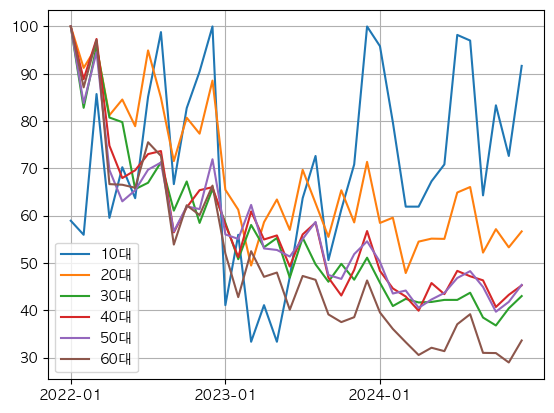

In [76]:
for age in ages:
    f1 = df_to_plot_base['age'] == age
    df_to_plot = df_to_plot_base[f1]
    df_to_plot['x'] = (df_to_plot['year']-2022)*12 + df_to_plot['month']

    x = df_to_plot['x']
    y = df_to_plot['ratio']
    plt.plot(x, y, label=age)

# Xticks
f1 = df_to_plot['x']%12 == 1
xtick_x = df_to_plot['x'][f1]
xticks = (df_to_plot['year'].astype(str) + '-'+  df_to_plot['month'].apply(lambda x: str(x).zfill(2)))[f1].to_list()

plt.xticks(xtick_x, xticks)
plt.grid()
plt.legend()

In [72]:
xtick_x

388     1
400    13
412    25
Name: x, dtype: int32

100%|██████████| 24/24 [00:01<00:00, 14.33it/s]


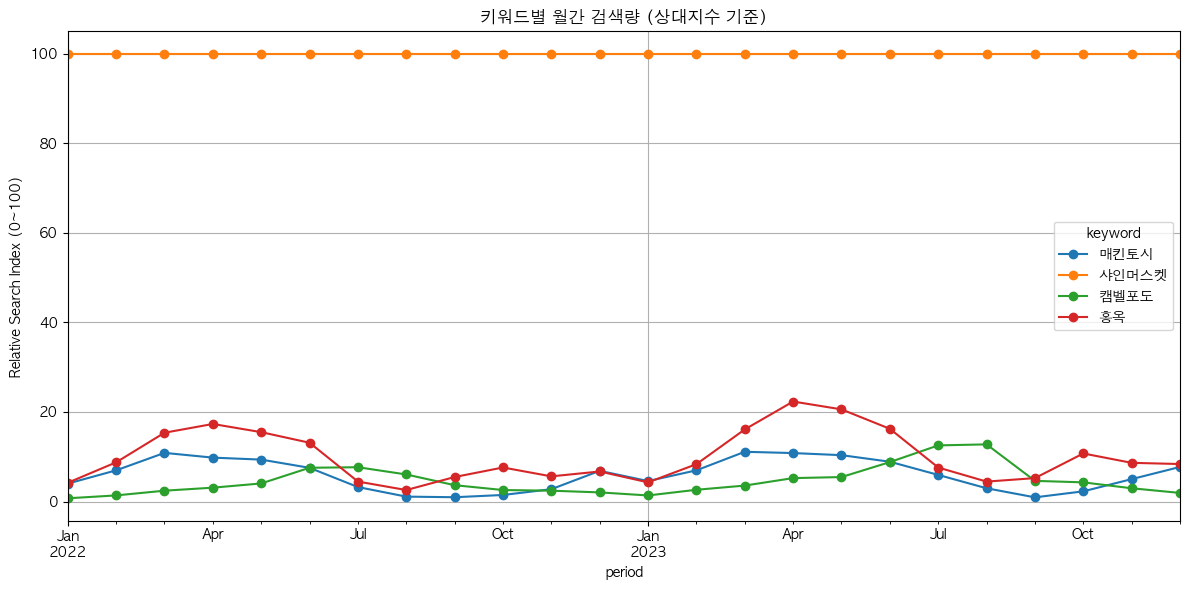

In [84]:
import requests
import json
import pandas as pd
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from tqdm import tqdm
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt

# 환경 변수 로딩
load_dotenv()
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

# 🔍 비교할 키워드 리스트
keywords = ["샤인머스켓", "캠벨포도", "홍옥", "매킨토시"]
start_month = "2022-01"
end_month = "2023-12"

# 월별 기간 생성 함수
def get_monthly_periods(start, end):
    start_dt = datetime.strptime(start, "%Y-%m")
    end_dt = datetime.strptime(end, "%Y-%m")
    periods = []
    while start_dt <= end_dt:
        s = start_dt.strftime("%Y-%m-01")
        e = (start_dt + relativedelta(months=1) - timedelta(days=1)).strftime("%Y-%m-%d")
        periods.append((s, e))
        start_dt += relativedelta(months=1)
    return periods

# 네이버 데이터랩 API 호출 함수
def fetch_monthly_data(start_date, end_date, keyword_groups):
    url = "https://openapi.naver.com/v1/datalab/search"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret,
        "Content-Type": "application/json"
    }

    body = {
        "startDate": start_date,
        "endDate": end_date,
        "timeUnit": "month",
        "keywordGroups": keyword_groups
    }

    res = requests.post(url, headers=headers, data=json.dumps(body))
    if res.status_code == 200:
        results = res.json()["results"]
        flat_data = []
        for group in results:
            for item in group["data"]:
                item["keyword"] = group["title"]
                flat_data.append(item)
        return flat_data
    else:
        print(f"Error on {start_date}~{end_date}: {res.status_code}, {res.text}")
        return []

# 요청 실행
def run():
    periods = get_monthly_periods(start_month, end_month)
    results = []

    keyword_groups = [{"groupName": kw, "keywords": [kw]} for kw in keywords]

    for s, e in tqdm(periods):
        data = fetch_monthly_data(s, e, keyword_groups)
        results.extend(data)

    df = pd.DataFrame(results)
    df["period"] = pd.to_datetime(df["period"])
    pivot_df = df.pivot(index="period", columns="keyword", values="ratio")

    # 시각화
    pivot_df.plot(figsize=(12, 6), marker='o', title="키워드별 월간 검색량 (상대지수 기준)")
    plt.ylabel("Relative Search Index (0~100)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return pivot_df

# 실행
if __name__ == "__main__":
    df_result = run()
    # df_result.to_csv("keyword_trends.csv", encoding="utf-8-sig")


In [85]:
pip install plotly

4340.92s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 58.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
import plotly.graph_objects as go

import requests
import json
import pandas as pd
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from tqdm import tqdm
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt

# 환경 변수 로딩
load_dotenv()
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

# 🔍 비교할 키워드 리스트
keywords = ["헬스장","피트니스","다이어트","운동","식단"]
start_month = "2022-01"
end_month = "2023-12"

In [23]:

# 월별 기간 생성 함수
def get_monthly_periods(start, end):
    start_dt = datetime.strptime(start, "%Y-%m")
    end_dt = datetime.strptime(end, "%Y-%m")
    periods = []
    while start_dt <= end_dt:
        s = start_dt.strftime("%Y-%m-01")
        e = (start_dt + relativedelta(months=1) - timedelta(days=1)).strftime("%Y-%m-%d")
        periods.append((s, e))
        start_dt += relativedelta(months=1)
    return periods

# 네이버 데이터랩 API 호출 함수
def fetch_monthly_data(start_date, end_date, keyword_groups):
    url = "https://openapi.naver.com/v1/datalab/search"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret,
        "Content-Type": "application/json"
    }

    body = {
        "startDate": start_date,
        "endDate": end_date,
        "timeUnit": "month",
        "keywordGroups": keyword_groups
    }

    res = requests.post(url, headers=headers, data=json.dumps(body))
    if res.status_code == 200:
        results = res.json()["results"]
        flat_data = []
        for group in results:
            for item in group["data"]:
                item["keyword"] = group["title"]
                flat_data.append(item)
        return flat_data
    else:
        print(f"Error on {start_date}~{end_date}: {res.status_code}, {res.text}")
        return []
    

# 인터랙티브 플롯
def plot_interactive(df):
    fig = go.Figure()

    for col in df.columns:
        fig.add_trace(go.Scatter(
            x=df.index,
            y=df[col],
            mode='lines+markers',
            name=col
        ))

    fig.update_layout(
        title="키워드별 월간 검색량 (상대지수 기준)",
        xaxis_title="기간",
        yaxis_title="검색량 지수 (0~100)",
        hovermode="x unified",
        template="plotly_white",
        width=1000,
        height=600
    )

    fig.show()

# 요청 실행
def run():
    periods = get_monthly_periods(start_month, end_month)
    results = []

    keyword_groups = [{"groupName": kw, "keywords": [kw]} for kw in keywords]

    for s, e in tqdm(periods):
        data = fetch_monthly_data(s, e, keyword_groups)
        results.extend(data)

    df = pd.DataFrame(results)
    df["period"] = pd.to_datetime(df["period"])
    pivot_df = df.pivot(index="period", columns="keyword", values="ratio")
    plot_interactive(pivot_df)
    # # 시각화
    # pivot_df.plot(figsize=(12, 6), marker='o', title="키워드별 월간 검색량 (상대지수 기준)")
    # plt.ylabel("Relative Search Index (0~100)")
    # plt.grid(True)
    # plt.tight_layout()
    # plt.show()

    return pivot_df

# 실행
if __name__ == "__main__":
    df_result = run()
    # df_result.to_csv("keyword_trends.csv", encoding="utf-8-sig")


100%|██████████| 24/24 [00:03<00:00,  7.00it/s]


In [3]:
import requests
import json
import pandas as pd
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from tqdm import tqdm
from dotenv import load_dotenv
import os
import plotly.graph_objects as go

# 환경 변수 로딩
load_dotenv()
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

# 키워드 및 연령대 설정
keyword = "샤인머스켓"
ages = ["1", "2", "3", "4", "5", "6"]
start_month = "2022-01"
end_month = "2023-12"

# 월별 기간 생성 함수
def get_monthly_periods(start, end):
    start_dt = datetime.strptime(start, "%Y-%m")
    end_dt = datetime.strptime(end, "%Y-%m")
    periods = []
    while start_dt <= end_dt:
        s = start_dt.strftime("%Y-%m-01")
        e = (start_dt + relativedelta(months=1) - timedelta(days=1)).strftime("%Y-%m-%d")
        periods.append((s, e))
        start_dt += relativedelta(months=1)
    return periods

# 네이버 데이터랩 API 호출 함수 (연령별 요청)
def fetch_age_data(start_date, end_date, keyword, age):
    url = "https://openapi.naver.com/v1/datalab/search"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret,
        "Content-Type": "application/json"
    }

    body = {
        "startDate": start_date,
        "endDate": end_date,
        "timeUnit": "month",
        "keywordGroups": [{"groupName": keyword, "keywords": [keyword]}],
        "ages": [age]
    }

    res = requests.post(url, headers=headers, data=json.dumps(body))
    if res.status_code == 200:
        results = res.json()["results"][0]["data"]
        for item in results:
            item["age"] = age
        return results
    else:
        print(f"Error on {start_date}~{end_date} for age {age}: {res.status_code}, {res.text}")
        return []

# 실행 함수
def run():
    periods = get_monthly_periods(start_month, end_month)
    results = []

    for s, e in tqdm(periods):
        for age in ages:
            data = fetch_age_data(s, e, keyword, age)
            results.extend(data)

    df = pd.DataFrame(results)
    df["period"] = pd.to_datetime(df["period"])
    pivot_df = df.pivot(index="period", columns="age", values="ratio")

    # 인터랙티브 그래프
    fig = go.Figure()
    for col in pivot_df.columns:
        fig.add_trace(go.Scatter(
            x=pivot_df.index,
            y=pivot_df[col],
            mode='lines+markers',
            name=f"{col}대"
        ))

    fig.update_layout(
        title=f"연령대별 '{keyword}' 검색량 추이",
        xaxis_title="기간",
        yaxis_title="검색량 지수 (0~100)",
        hovermode="x unified",
        template="plotly_white",
        width=1000,
        height=600
    )

    fig.show()
    return pivot_df

# 실행
if __name__ == "__main__":
    df_result = run()
    # df_result.to_csv("age_keyword_trends.csv", encoding="utf-8-sig")


100%|██████████| 24/24 [00:08<00:00,  2.69it/s]


---

In [22]:
df_kwds = pd.read_csv('./data/w2/wiktionary_foodlist.csv', index_col=0)

In [39]:
# 사용 예시
kwds = df_kwds['0'].to_list()
df_search = pd.DataFrame()

for i in range(1, int(len(kwds)/5+1)):
    kwds_to_search = kwds[i*5:(i+1)*5]
    df_tmp = get_search_trend(
        startDate="2023-01-01",
        endDate="2024-12-31",
        keywords=kwds_to_search
    )

    df_search = pd.concat([df_search, df_tmp])

Error: 400
{"errMsg":"TypeError: .keywordGroups -> should NOT have less than 1 items","errId":"2025-04-21T21:36:22+09:00/797615849-246834239","body":"{\"startDate\":\"2023-01-01\",\"endDate\":\"2024-12-31\",\"timeUnit\":\"date\",\"keywordGroups\":[]}"}


In [41]:
df_search.shape

(251090, 3)

In [54]:
df_search

,date,keyword,ratio
0,2023-01-01,간장,6.40865
1,2023-01-02,간장,6.79705
2,2023-01-03,간장,8.05937
3,2023-01-04,간장,7.39353
4,2023-01-05,간장,7.87904
...,...,...,...
2649,2024-11-01,희아리,1.26262
2650,2024-11-03,희아리,1.51515
2651,2024-11-14,희아리,1.51515
2652,2024-11-24,희아리,1.26262


In [44]:
df_search['keyword'].value_counts()

keyword
간장        731
양장피       731
오르되브르     731
오렌지 주스    731
오니기리      731
         ... 
삼두음         2
삼합미음        2
수타 자장       1
밥감주         1
애기젖가루       1
Name: count, Length: 393, dtype: int64

In [52]:
df_search[['keyword', 'ratio']].groupby('keyword').mean().sort_values(by='ratio', ascending=False).iloc[:20]

,ratio
keyword,
차,76.408444
국,67.296898
계란,66.062557
크림,63.618615
먹거리,61.605824
고기,61.034798
죽,60.243192
된장찌개,59.822440
마요네즈,59.731602


In [46]:
df_search[df_search['keyword'] == '오니기리']

,date,keyword,ratio
2051,2023-01-01,오니기리,42.64184
2052,2023-01-02,오니기리,51.24113
2053,2023-01-03,오니기리,56.02836
2054,2023-01-04,오니기리,49.46808
2055,2023-01-05,오니기리,52.65957
...,...,...,...
2777,2024-12-27,오니기리,41.40070
2778,2024-12-28,오니기리,49.02482
2779,2024-12-29,오니기리,48.49290
2780,2024-12-30,오니기리,46.54255


In [7]:
def collect_data_by_period(start_date, end_date, interval_days=30):
    """기간을 나누어 데이터 수집"""
    start = datetime.strptime(start_date, "%Y-%m-%d")
    end = datetime.strptime(end_date, "%Y-%m-%d")
    
    all_results = []
    current = start
    
    while current < end:
        period_end = min(current + timedelta(days=interval_days), end)
        
        # 데이터 수집
        period_data = get_shopping_insight(
            startDate=current.strftime("%Y-%m-%d"),
            endDate=period_end.strftime("%Y-%m-%d"),
            category=category
        )
        
        if period_data is not None:
            all_results.append(period_data)
        
        current = period_end + timedelta(days=1)
    
    # 모든 결과 합치기
    return pd.concat(all_results, ignore_index=True)

In [10]:
# 데이터 저장
def save_results(df, filename):
    # CSV로 저장
    df.to_csv(f"{filename}.csv", index=False, encoding='utf-8-sig')
    
    # Parquet로 저장
    df.to_parquet(f"{filename}.parquet")

# 데이터 수집 및 저장
df_shopping = collect_data_by_period("2023-01-01", "2024-03-20")
save_results(df_shopping, "naver_shopping_trends")

# 간단한 분석
def analyze_trends(df):
    # 카테고리별 평균 비율
    category_avg = df.groupby('category')['ratio'].mean()
    
    # 시간별 트렌드
    time_trend = df.pivot(index='date', columns='category', values='ratio')
    
    # 최근 30일 트렌드
    recent_trend = df[df['date'] >= (pd.Timestamp.now() - pd.Timedelta(days=30))]
    
    return {
        'category_avg': category_avg,
        'time_trend': time_trend,
        'recent_trend': recent_trend
    }

## [2] 맛집검색

In [13]:
import requests
import json
import pandas as pd
from datetime import datetime, timedelta
import time
from bs4 import BeautifulSoup
import re


## env
from dotenv import load_dotenv
import os


class NaverPlaceAnalyzer:
    def __init__(self, client_id, client_secret):
        self.client_id = client_id
        self.client_secret = client_secret
        self.headers = {
            "X-Naver-Client-Id": client_id,
            "X-Naver-Client-Secret": client_secret
        }

    def search_places(self, query, display=5):
        """네이버 지역 검색 API를 사용하여 장소 검색"""
        url = "https://openapi.naver.com/v1/search/local.json"
        params = {
            "query": query,
            "display": display,
            "sort": "comment"  # 리뷰/평점 순 정렬
        }
        
        try:
            response = requests.get(url, headers=self.headers, params=params)
            if response.status_code == 200:
                return response.json().get('items', [])
            else:
                print(f"Error: {response.status_code}")
                return []
        except Exception as e:
            print(f"Error: {str(e)}")
            return []

    def get_place_details(self, place_name, address):
        """네이버 플레이스 상세 정보 수집 (웹 스크래핑)"""
        # 실제 구현시에는 네이버 플레이스 웹페이지 스크래핑 로직 필요
        # 여기서는 예시로 기본 구조만 제공
        pass

    def analyze_trending_places(self, area, category="맛집", limit=20):
        """특정 지역의 트렌딩 장소 분석"""
        search_query = f"{area} {category}"
        places = self.search_places(search_query, display=limit)
        
        results = []
        for place in places:
            # 기본 정보 추출
            place_info = {
                'name': place.get('title', '').replace('<b>', '').replace('</b>', ''),
                'address': place.get('address', ''),
                'category': place.get('category', ''),
                'description': place.get('description', ''),
                'link': place.get('link', '')
            }
            results.append(place_info)
            
            # API 호출 제한 고려
            time.sleep(0.1)
        
        return pd.DataFrame(results)

def analyze_hot_places(api_handler, areas, categories=None):
    """여러 지역의 인기 장소 분석"""
    if categories is None:
        categories = ["맛집"]
    
    all_results = []
    
    for area in areas:
        for category in categories:
            print(f"Analyzing {category} in {area}...")
            df = api_handler.analyze_trending_places(area, category)
            df['area'] = area
            df['search_category'] = category
            all_results.append(df)
            
            # API 호출 제한 고려
            time.sleep(1)
    
    return pd.concat(all_results, ignore_index=True)

# 사용 예시
def main():
    # API 인증 정보
    load_dotenv()  # .env 파일 로드
    client_id = os.getenv("CLIENT_ID")
    client_secret = os.getenv("CLIENT_SECRET")

    
    analyzer = NaverPlaceAnalyzer(client_id, client_secret)
    
    # 분석할 지역과 카테고리 설정
    areas = ["강남역", "홍대입구", "이태원"]
    categories = ["맛집", "카페", "술집"]
    
    # 트렌딩 장소 분석
    trending_places = analyze_hot_places(analyzer, areas, categories)
    
    # 결과 저장
    trending_places.to_csv('trending_places.csv', 
                          index=False, 
                          encoding='utf-8-sig')
    
    # 기본 분석
    print("\n=== 지역별 인기 장소 수 ===")
    print(trending_places.groupby(['area', 'search_category']).size())
    
    # 카테고리 분석
    print("\n=== 카테고리 분포 ===")
    print(trending_places['category'].value_counts().head())

if __name__ == "__main__":
    main()

Analyzing 맛집 in 강남역...
Analyzing 카페 in 강남역...
Analyzing 술집 in 강남역...
Analyzing 맛집 in 홍대입구...
Analyzing 카페 in 홍대입구...
Analyzing 술집 in 홍대입구...
Analyzing 맛집 in 이태원...
Analyzing 카페 in 이태원...
Analyzing 술집 in 이태원...

=== 지역별 인기 장소 수 ===
area  search_category
강남역   맛집                 5
      술집                 5
      카페                 5
이태원   맛집                 5
      술집                 5
      카페                 5
홍대입구  맛집                 5
      술집                 5
      카페                 5
dtype: int64

=== 카테고리 분포 ===
category
카페,디저트>카페      6
술집>요리주점        5
카페,디저트>베이커리    4
술집>이자카야        3
음식점>카페,디저트     3
Name: count, dtype: int64


## [3] 연관검색어

In [62]:
import requests
import json
import pandas as pd
import numpy as np
from collections import Counter
import time
from tqdm import tqdm

plt.rcParams['font.family'] = 'AppleGothic'

class NaverKeywordAnalyzer:
    def __init__(self, client_id, client_secret):
        self.client_id = client_id
        self.client_secret = client_secret
        self.headers = {
            "X-Naver-Client-Id": client_id,
            "X-Naver-Client-Secret": client_secret,
            "Content-Type": "application/json"
        }

    def get_trend_data(self, keywords, start_date, end_date):
        """데이터랩 API로 트렌드 데이터 가져오기 (5개 단위로 분할)"""
        all_results = []
        
        # 키워드를 5개씩 분할
        for i in range(0, len(keywords), 5):
            chunk_keywords = keywords[i:i+5]
            
            body = {
                "startDate": start_date,
                "endDate": end_date,
                "timeUnit": "month",
                "keywordGroups": [
                    {
                        "groupName": keyword,
                        "keywords": [keyword]
                    } for keyword in chunk_keywords
                ]
            }
            
            try:
                response = requests.post(
                    "https://openapi.naver.com/v1/datalab/search",
                    headers=self.headers,
                    data=json.dumps(body)
                )
                
                if response.status_code == 200:
                    result = response.json()
                    if 'results' in result:
                        all_results.extend(result['results'])
                else:
                    print(f"Error {response.status_code}: {response.text}")
                
                # API 호출 제한 고려
                time.sleep(1)
                
            except Exception as e:
                print(f"Error: {str(e)}")
        
        return {"results": all_results} if all_results else None

    def find_related_keywords(self, seed_keyword, max_depth=2, min_correlation=0.3):
        """연관 키워드 찾기"""
        processed_keywords = set()
        related_keywords = []
        
        def process_keyword(keyword, depth):
            if depth > max_depth or keyword in processed_keywords:
                return
            
            processed_keywords.add(keyword)
            print(f"Processing: {keyword} (depth {depth})")
            
            # 검색 API로 연관 키워드 찾기
            url = f"https://openapi.naver.com/v1/search/shop.json"
            params = {"query": keyword, "display": 100}
            
            try:
                response = requests.get(url, headers=self.headers, params=params)
                if response.status_code == 200:
                    items = response.json().get('items', [])
                    
                    # 제목에서 키워드 추출
                    keywords = []
                    for item in items:
                        title = item['title'].replace('<b>', '').replace('</b>', '')
                        words = [w for w in title.split() if len(w) > 1]
                        keywords.extend(words)
                    
                    # 상위 빈도 키워드 선택
                    keyword_freq = Counter(keywords)
                    top_keywords = [k for k, v in keyword_freq.most_common(5)]
                    
                    if top_keywords:
                        related_keywords.extend(top_keywords)
                        
                        # 재귀적으로 처리
                        if depth < max_depth:
                            for related_keyword in top_keywords:
                                time.sleep(1)  # API 호출 제한
                                process_keyword(related_keyword, depth + 1)
                
                time.sleep(1)  # API 호출 제한
                
            except Exception as e:
                print(f"Error: {str(e)}")
        
        # 시작 키워드로부터 연관 키워드 찾기
        process_keyword(seed_keyword, 0)
        
        # 중복 제거 및 최대 20개 키워드 선택
        unique_keywords = list(dict.fromkeys(related_keywords))[:20]
        
        # 트렌드 데이터 수집 및 상관관계 분석
        trend_data = self.get_trend_data(
            [seed_keyword] + unique_keywords,
            "2023-01-01",
            "2024-03-31"
        )
        
        if trend_data and 'results' in trend_data:
            # 트렌드 데이터를 DataFrame으로 변환
            trends = {}
            for result in trend_data['results']:
                trends[result['title']] = [d['ratio'] for d in result['data']]
            
            df_trends = pd.DataFrame(trends)
            
            # 상관관계 계산
            correlations = df_trends.corr()[seed_keyword].sort_values(ascending=False)
            
            # 상관관계가 높은 키워드만 선택
            related_with_corr = correlations[correlations >= min_correlation]
            
            return pd.DataFrame({
                'keyword': related_with_corr.index,
                'correlation': related_with_corr.values
            })
        
        return pd.DataFrame()

def main():
    load_dotenv()  # .env 파일 로드
    client_id = os.getenv("CLIENT_ID")
    client_secret = os.getenv("CLIENT_SECRET")
    
    analyzer = NaverKeywordAnalyzer(client_id, client_secret)
    
    # 건강식 관련 키워드 분석
    seed_keyword = "건강식품"
    results = analyzer.find_related_keywords(
        seed_keyword,
        max_depth=2,
        min_correlation=0.3
    )
    
    if not results.empty:
        print("\n=== 연관 키워드 분석 결과 ===")
        print(results.to_string(index=False))
        
        # 결과 저장
        results.to_csv(f'{seed_keyword}_related_keywords.csv', 
                      index=False, 
                      encoding='utf-8-sig')
        
        # 시각화
        plt.figure(figsize=(12, 6))
        plt.barh(results['keyword'], results['correlation'])
        plt.title(f"'{seed_keyword}'의 연관 키워드 상관관계")
        plt.xlabel('상관계수')
        plt.ylabel('키워드')
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    main()

Processing: 건강식품 (depth 0)
Processing: 유산균 (depth 1)
Processing: 프로바이오틱스 (depth 2)
Processing: 1개 (depth 2)
Processing: 3개 (depth 2)
Processing: 60캡슐, (depth 2)
Processing: 락토핏 (depth 1)
Processing: 생유산균 (depth 2)
Processing: 2g (depth 2)
Processing: 종근당건강 (depth 2)


ValueError: All arrays must be of the same length

## [4] 만개의레시피

In [12]:
loc = './data/w2/'
file = [f for f in os.listdir(loc) if '20231130' in f][-1]

df_recipe = pd.read_csv(loc+file, encoding='cp949')

UnicodeDecodeError: 'cp949' codec can't decode byte 0xc9 in position 349972: illegal multibyte sequence

---
## [9] 기타

In [8]:
# 수정일자 : 240326
df_stores = pd.read_csv('./data/w2/전국일반음식점표준데이터_240326.csv', encoding='cp949')

/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_2349/1097187942.py:2: DtypeWarning: Columns (11,17,39,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df_stores = pd.read_csv('./data/w2/전국일반음식점표준데이터_240326.csv', encoding='cp949')


In [9]:
df_stores.columns

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보x(epsg5174)',
       '좌표정보y(epsg5174)', '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명',
       '급수시설구분명', '총직원수', '본사직원수', '공장사무직직원수', '공장판매직직원수', '공장생산직직원수',
       '건물소유구분명', '보증액', '월세액', '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식',
       '홈페이지', 'Unnamed: 47'],
      dtype='object')

In [10]:
df_stores['영업상태명'].value_counts()

영업상태명
폐업       1511419
영업/정상     688444
Name: count, dtype: int64

In [11]:
df_stores[['위생업태명']].value_counts()

위생업태명          
한식                 1004952
기타                  254534
호프/통닭               207886
분식                  182852
경양식                 123793
식육(숯불구이)             72968
중국식                  71292
일식                   55650
통닭(치킨)               54598
정종/대포집/소주방           45113
횟집                   31919
까페                   22017
패스트푸드                18662
뷔페식                  10810
탕류(보신용)              10175
외국음식전문점(인도,태국등)       9649
김밥(도시락)               9459
전통찻집                  2275
라이브카페                 1843
패밀리레스트랑               1718
냉면집                   1694
감성주점                  1580
복어취급                  1446
출장조리                  1212
이동조리                   904
키즈카페                   666
일반조리판매                   9
기타 휴게음식점                 8
커피숍                      5
간이주점                     4
다방                       2
룸살롱                      1
제과점영업                    1
식품등 수입판매업                1
식품소분업                    1
Name: count, dtype: int64

In [ ]:
import duckdb

# DuckDB 연결
con = duckdb.connect()

# 모든 Parquet 파일을 한 번에 쿼리
query = """
SELECT *
FROM read_parquet('data/w2/jangbogo/jbg_parquet/*.parquet')
"""

# DataFrame으로 변환
df = con.execute(query).df()

In [12]:
f1 = df_stores['소재지전체주소'].apply(lambda x: str(x).split(' ')[0]) == '서울특별시'
df_stores_sl = df_stores[f1]

In [13]:
df_stores_sl

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직직원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
0,1,일반음식점,07_24_04_P,3230000,3230000-101-2020-00923,2020-12-31,NaN,3,폐업,2,...,0.0,NaN,0.0,0.0,N,34.32,NaN,NaN,NaN,NaN
2,3,일반음식점,07_24_04_P,3130000,3130000-101-1991-00615,1991-04-08,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,38.82,NaN,NaN,NaN,NaN
3,4,일반음식점,07_24_04_P,3130000,3130000-101-1991-03690,1991-04-03,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,24.50,NaN,NaN,NaN,NaN
4,5,일반음식점,07_24_04_P,3130000,3130000-101-1997-08442,1997-01-01,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,0.00,NaN,NaN,NaN,NaN
5,6,일반음식점,07_24_04_P,3160000,3160000-101-2017-00107,2017-04-14,NaN,3,폐업,2,...,NaN,NaN,NaN,NaN,N,133.91,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183516,2183517,일반음식점,07_24_04_P,3140000,3140000-101-2024-00169,2024-05-31,NaN,1,영업/정상,1,...,0.0,NaN,0.0,0.0,N,30.94,NaN,NaN,NaN,NaN
2183517,2183518,일반음식점,07_24_04_P,3140000,3140000-101-2024-00168,2024-05-31,NaN,1,영업/정상,1,...,0.0,NaN,0.0,0.0,N,125.00,NaN,NaN,NaN,NaN
2183518,2183519,일반음식점,07_24_04_P,3140000,3140000-101-2024-00167,2024-05-31,NaN,1,영업/정상,1,...,0.0,NaN,0.0,0.0,N,83.00,NaN,NaN,NaN,NaN
2188943,2188944,일반음식점,07_24_04_P,3080000,3080000-101-2024-00180,2024-05-30,NaN,1,영업/정상,1,...,0.0,NaN,0.0,0.0,Y,101.64,NaN,NaN,NaN,NaN


In [36]:
import requests
from bs4 import BeautifulSoup

# 나무위키 한국 요리 목록 페이지
url = "https://namu.wiki/w/%ED%95%9C%EA%B5%AD%20%EC%9A%94%EB%A6%AC/%EB%AA%A9%EB%A1%9D"

headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# 항목 추출 (li 태그에서 텍스트만 뽑기)
items = soup.select("div[class^='wiki-paragraph'] ul li")

korean_foods = list(set([item.get_text(strip=True) for item in items if item.get_text(strip=True)]))

# 미리보기 출력
print("한국 요리 키워드 개수:", len(korean_foods))
print(korean_foods[:30])

한국 요리 키워드 개수: 0
[]


In [41]:
import re

# 전체 텍스트 복사 붙여넣기
with open("./data/w2/namuwiki_korean_dishes.txt", "r", encoding="utf-8") as f:
    text = f.read()

# 괄호 설명 제거 (ex: 김치볶음밥 : 볶음밥에 김치를 넣은 요리)
text = re.sub(r'\([^)]*\)', '', text)

# 문장 부호로 끝나는 줄 제거 (섹션 이름, 설명 등)
lines = [line.strip() for line in text.splitlines() if line and not line.endswith(':')]

# 2글자 이상 한글 단어만 추출 (숫자, 불용어 제외)
dish_candidates = []
for line in lines:
    # 한 줄에서 쉼표 또는 공백 기준으로 나누기
    parts = re.split(r'[,\s]', line)
    for part in parts:
        if re.fullmatch(r'[가-힣]{2,}', part):
            dish_candidates.append(part)

# 중복 제거 + 정렬
dish_names = sorted(set(dish_candidates))

# 결과 미리보기
print(f"총 요리 후보 개수: {len(dish_names)}")
print(dish_names[:30])

총 요리 후보 개수: 1484
['가공된', '가까운', '가깝고', '가도', '가래떡', '가래떡을', '가루', '가리키는', '가릿국밥', '가열하는', '가장', '가제육', '가지로', '가지의', '각각', '간고등어', '간단한', '간소한', '간식으로', '간장', '간장게장', '간장에', '간장의', '간장치킨', '간짜장', '갈비', '갈비찜', '갈비탕', '갈수', '갈치조림']


In [40]:
dish_names

['가공된',
 '가기',
 '가까운',
 '가깝고',
 '가도',
 '가래떡',
 '가래떡을',
 '가루',
 '가리키는',
 '가릿국밥',
 '가사도우미',
 '가열하는',
 '가장',
 '가제육',
 '가지로',
 '가지의',
 '각각',
 '간고등어',
 '간단한',
 '간소한',
 '간식으로',
 '간장',
 '간장게장',
 '간장양념풍',
 '간장에',
 '간장의',
 '간장치킨',
 '간짜장',
 '갈비',
 '갈비찜',
 '갈비탕',
 '갈수',
 '갈치조림',
 '갈치찌개',
 '감말랭이',
 '감식초',
 '감자',
 '감자조림',
 '감자탕',
 '감잣국',
 '감주',
 '갓김치',
 '강냉이',
 '강원도의',
 '강정',
 '강화',
 '갖가지',
 '갖은',
 '갖은양념을',
 '같은',
 '같이',
 '개떡',
 '개발되었으며',
 '개발하여',
 '개발한',
 '개불',
 '개성시의',
 '개성주악',
 '개성지방의',
 '개요',
 '거의',
 '건조과일',
 '건조묵',
 '걸쭉한',
 '검증되지',
 '것과',
 '것까지',
 '것도',
 '것부터',
 '것으로',
 '것은',
 '것을',
 '것이',
 '것이고',
 '것이었으나',
 '것인데',
 '것임을',
 '겉절이',
 '게이머',
 '게임',
 '게장',
 '게재',
 '겨울철에',
 '경단',
 '경상도',
 '경우',
 '경우가',
 '곁들이는',
 '계란',
 '계란국',
 '계란말이',
 '계란빵',
 '계란의',
 '계란찜',
 '고갈비',
 '고구마',
 '고구마튀김',
 '고기',
 '고기국수',
 '고기를',
 '고기와',
 '고기의',
 '고깃집에서',
 '고등어구이',
 '고등어조림',
 '고로쇠물',
 '고명',
 '고명으로',
 '고명이',
 '고사릿국',
 '고아',
 '고아서',
 '고유의',
 '고추장',
 '고추장찌개',
 '고추튀김',
 '고칠',
 '곡류',
 '곡식을',
 '곤드레',
 '곤드레밥',
 '골뱅이무침',
 '골뱅이소면

In [44]:
from konlpy.tag import Komoran
komoran = Komoran()

def is_noun(word):
    pos = komoran.pos(word)
    return all(tag == 'NNG' or tag == 'NNP' for _, tag in pos)

filtered = [word for word in dish_names if is_noun(word)]

In [52]:
len(dish_names)

1484

In [46]:
len(filtered)

624

In [50]:
ls_to_rmv = ['가도', '강화',
 '갖가지', '개성시의', '개요', '경상도',
 '경우', '관련',
 '광주광역시',
 '구분',]

In [72]:
https://ko.wiktionary.org/w/index.php?title=분류:한국어_음식&pageuntil=샴팡%0A샴팡#mw-pages
https://ko.wiktionary.org/w/index.php?title=분류:한국어_음식&pagefrom=샴팡%0A샴팡#mw-pages

In [74]:
import requests
from bs4 import BeautifulSoup
import time

BASE_URL = "https://ko.wiktionary.org"
START_URL = BASE_URL + "/w/index.php?title=분류:한국어_음식"

headers = {
    "User-Agent": "Mozilla/5.0"
}

all_foods = set()

def get_food_list(url):
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    # 음식 이름 리스트 추출
    items = soup.select("#mw-pages div.mw-category li a")
    for item in items:
        all_foods.add(item.get_text(strip=True))

    # 다음 페이지로 넘어가기 위한 링크 (있는 경우만)
    next_link = soup.select_one("a:contains('다음 페이지')")
    if next_link:
        next_url = BASE_URL + next_link['href']
        print("다음 페이지 이동:", next_url)
        time.sleep(1)  # 예의상 딜레이
        get_food_list(next_url)

# 크롤링 시작
get_food_list(START_URL)

# 결과 정렬 및 출력
food_list = sorted(all_foods)
print(f"총 수집된 음식 항목 수: {len(food_list)}")
print(food_list[:30])  # 앞부분 미리보기

# 저장 옵션 (선택)
# with open("korean_foods.txt", "w", encoding="utf-8") as f:
#     for food in food_list:
#         f.write(food + "\n")

/Users/byunghoonlee/Documents/Side Projects/Data Projects/.venv/lib/python3.12/site-packages/soupsieve/css_parser.py:862: FutureWarning: The pseudo class ':contains' is deprecated, ':-soup-contains' should be used moving forward.
  warnings.warn(  # noqa: B028


다음 페이지 이동: https://ko.wiktionary.org/w/index.php?title=%EB%B6%84%EB%A5%98:%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9D%8C%EC%8B%9D&pagefrom=%EC%83%B4%ED%8C%A1%0A%EC%83%B4%ED%8C%A1#mw-pages
다음 페이지 이동: https://ko.wiktionary.org/w/index.php?title=%EB%B6%84%EB%A5%98:%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9D%8C%EC%8B%9D&pagefrom=%ED%98%B8%EB%96%A1%0A%ED%98%B8%EB%96%A1#mw-pages
총 수집된 음식 항목 수: 410
['가락지빵', '가래떡', '가루우유', '가지나물', '간고등어', '간장', '간장치킨', '갈비', '갈비탕', '감자튀기', '감자튀김', '강냉이', '강정', '개떡', '개장', '건빵', '겨울냉면', '경편', '계란', '계란덮밥', '계란말이', '고기', '고기겹빵', '고량소주', '고량주', '고로케', '고추가루', '고추장', '고춧가루', '곤밥']


In [77]:
pd.Series(food_list).to_csv('./data/foodlist.csv')

---

# W1. KADX 가격 데이터 분석

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt

Duplicate key in file PosixPath('/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/mpl-data/matplotlibrc'), line 419 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')


## D1. 데이터 정제 및 전처리

In [2]:
# [1] 성별/연령별 농식품 소비량
df_pref = pd.read_csv('./data/TB_SEX_AGE_CSP_SPL-2023.csv', encoding='cp949')
df_pref_info = pd.read_csv('./data/소비자 성_연령대별 농식품 소비 샘플데이터_데이터명세서.csv')
df_pref_info = df_pref_info[~df_pref_info['no'].isna()]

In [3]:
# Rename Columns
dic_rename = {}
for k, v in zip(df_pref_info['nameEn'], df_pref_info['nameKo']):
    dic_rename.update({k:v})

df_pref.columns = [dic_rename[c] for c in df_pref.columns]

In [4]:
df_pref_info

,no,pk,type,nameEn,nameKo
0,0.0,Y,CHAR(6),BASE_YM,기준연월
1,1.0,Y,VARCHAR(20),CSP_AREA_WSIDO_NM,소비지역광역시도명
2,2.0,Y,VARCHAR(20),CSP_AREA_SGGU_NM,소비지역시군구명
3,3.0,N,BIGINT,MLE_CSP_AMNT,남성소비금액
4,4.0,N,BIGINT,WO_CSP_AMNT,여성소비금액
5,5.0,N,INT,MLE_CSP_NCAS,남성소비건수
6,6.0,N,INT,WO_CSP_NCAS,여성소비건수
7,7.0,N,BIGINT,MLE_Y20_BELO_CSP_AMNT,남성20대미만소비금액
8,8.0,N,BIGINT,WO_Y20_BELO_CSP_AMNT,여성20대미만소비금액
9,9.0,N,BIGINT,MLE_Y20_CSP_AMNT,남성20대소비금액


In [42]:
# [1] 성별/연령별 농식품 소비량
df_pref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준연월         2748 non-null   int64  
 1   소비지역광역시도명    2748 non-null   object 
 2   소비지역시군구명     2748 non-null   object 
 3   남성소비금액       2748 non-null   int64  
 4   여성소비금액       2748 non-null   int64  
 5   남성소비건수       2748 non-null   int64  
 6   여성소비건수       2748 non-null   int64  
 7   남성20대미만소비금액  1857 non-null   float64
 8   여성20대미만소비금액  1563 non-null   float64
 9   남성20대소비금액    2748 non-null   int64  
 10  여성20대소비금액    2748 non-null   int64  
 11  남성30대소비금액    2748 non-null   int64  
 12  여성30대소비금액    2748 non-null   int64  
 13  남성40대소비금액    2748 non-null   int64  
 14  여성40대소비금액    2748 non-null   int64  
 15  남성50대소비금액    2748 non-null   int64  
 16  여성50대소비금액    2748 non-null   int64  
 17  남성60대이상소비금액  2748 non-null   int64  
 18  여성60대이상소비금액  2748 non-null   int64  
dtypes: flo

In [5]:
# ifmissing
df_pref.isna().sum()

기준연월              0
소비지역광역시도명         0
소비지역시군구명          0
남성소비금액            0
여성소비금액            0
남성소비건수            0
여성소비건수            0
남성20대미만소비금액     891
여성20대미만소비금액    1185
남성20대소비금액         0
여성20대소비금액         0
남성30대소비금액         0
여성30대소비금액         0
남성40대소비금액         0
여성40대소비금액         0
남성50대소비금액         0
여성50대소비금액         0
남성60대이상소비금액       0
여성60대이상소비금액       0
dtype: int64

In [6]:
c = '남성20대미만소비금액'
cols = ['기준연월','소비지역광역시도명','소비지역시군구명',c]
df_pref[df_pref[c].isna()][cols]

,기준연월,소비지역광역시도명,소비지역시군구명,남성20대미만소비금액
0,202301,강원도,강릉시,NaN
1,202301,강원도,고성군,NaN
2,202301,강원도,동해시,NaN
3,202301,강원도,삼척시,NaN
4,202301,강원도,속초시,NaN
...,...,...,...,...
2464,202311,전라남도,보성군,NaN
2490,202311,전라북도,진안군,NaN
2593,202312,경상북도,봉화군,NaN
2598,202312,경상북도,영양군,NaN


---

In [7]:
# [2] 도소매 가격
import unicodedata

folder = './data/'
files = [unicodedata.normalize('NFC', c) for c in os.listdir(folder)]
files = [
    c for c in files if '명세서' not in c and '가격' in c and 'csv' in c
]

In [8]:
# 2023
target = unicodedata.normalize('NFC', '2023년')  # 비교 기준도 정규화
files_2023 = [
    c for c in files if '2023년' in c
]
files_2023.sort()

In [9]:
# 월별 파일
yearly_f = [f for f in files if '월' not in f]
yearly_f = sorted(yearly_f, key=lambda x: x[:4])
# 년별 파일
monthly_f = [f for f in files if '월' in f]
monthly_f = sorted(monthly_f, key=lambda x: x[:8])

In [10]:
set([int(c[:4]) for c in yearly_f]).difference(range(1996,2020))

set()

In [11]:
set([c[:4] for c in monthly_f])

{'2020', '2021', '2022', '2023', '2024'}

In [12]:
ls_yms = [f[:8].replace('년 ','') for f in monthly_f]
df_yms = pd.DataFrame(ls_yms, columns=['ym'])

In [13]:
# 중복 데이터가 있는지
print('- 중복 데이터 수: ', (df_yms.value_counts() != 1).sum())

- 중복 데이터 수:  0


In [15]:
# 연별 월 데이터가 다 있는지
df_yms['y'] = df_yms['ym'].astype(int)//100
df_yms['y'].value_counts()

df_yms['m'] = df_yms['ym'].astype(int)%100

# Standard M
df_stdm = pd.DataFrame(range(1,13), columns=['m'])

In [16]:
for yr in [2021, 2022, 2024]:
    df_tmp = pd.merge(df_stdm, df_yms.query(f'y=={yr}').sort_values(by='ym'), on='m', how='outer')
    df_tmp['y'] = yr
    to_print = df_tmp[df_tmp['ym'].isna()]['y'].astype(str) + df_tmp[df_tmp['ym'].isna()]['m'].apply(lambda x: str(x).zfill(2))
    print(to_print)

1     202102
3     202104
10    202111
dtype: object
1    202202
5    202206
dtype: object
2     202403
3     202404
4     202405
5     202406
6     202407
7     202408
8     202409
9     202410
10    202411
11    202412
dtype: object


---

In [17]:
df_prices_info = pd.read_csv('./data/농수축산물 일자별 도소매 가격_데이터명세서.csv')

In [18]:
df_prices_23 = pd.DataFrame()
for f in files_2023:
    df_tmp = pd.read_csv(folder+f, encoding='cp949')
    df_prices_23 = pd.concat([df_prices_23, df_tmp])

df_prices_23['PRCE_REG_YMD'] = pd.to_datetime(df_prices_23['PRCE_REG_YMD'], format='%Y%m%d')
df_prices_23['DOY'] = df_prices_23['PRCE_REG_YMD'].dt.day_of_year

In [19]:
# 코드	 의미	 > 해당내용
# 01	소매	> 전통시장 등 소매시장
# 02	도매	> 도매시장
# 07	대형유통업체(소매)	> 'SSM', '대형마트', '백화점', '생협', '전문점', '직매장’
# 08	슈퍼마켓	> ‘슈퍼마켓’, ‘SSM’     *SSM: 기업형 슈퍼마켓 
# 09	온라인	> * CTNP_NM / SGGU_NM : 온라인

In [43]:
df_prices_23.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1263943 entries, 0 to 103913
Data columns (total 28 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   PRCE_REG_YMD           1263943 non-null  datetime64[ns]
 1   MRKT_ESNT_NO           1263943 non-null  int64         
 2   MRKT_CODE              1263943 non-null  int64         
 3   MRKT_NM                1263943 non-null  object        
 4   CTNP_CODE              1263943 non-null  int64         
 5   CTNP_NM                1263943 non-null  object        
 6   SGGU_CODE              1263943 non-null  int64         
 7   SGGU_NM                1263943 non-null  object        
 8   PDLT_CODE              1263943 non-null  int64         
 9   PDLT_NM                1263943 non-null  object        
 10  SPCS_CODE              1263943 non-null  int64         
 11  SPCS_NM                1263943 non-null  object        
 12  WSRT_EXMN_SE_CODE      1263943 non

### * 정의서

In [20]:
df_prices_info

,no,pk,type,nameEn,nameKo
0,1,N,CHAR(8),PRCE_REG_YMD,가격등록일자
1,2,N,VARCHAR(8),MRKT_ESNT_NO,시장고유번호
2,3,Y,VARCHAR(8),MRKT_CODE,시장코드
3,4,Y,VARCHAR(30),MRKT_NM,시장명
4,5,N,VARCHAR(8),CTNP_CODE,시도코드
5,6,Y,VARCHAR(30),CTNP_NM,시도명
6,7,N,VARCHAR(8),SGGU_CODE,시군구코드
7,8,Y,VARCHAR(20),SGGU_NM,시군구명
8,9,N,VARCHAR(100),PDLT_CODE,품목코드
9,10,N,VARCHAR(50),PDLT_NM,품목명


In [21]:
i=9
sorted(df_prices_23['PDLT_NM'].unique())[i*10:(i+1)*10]

['콩', '콩나물', '토마토', '파', '파인애플', '파프리카', '팥', '팽이버섯', '포도', '표고버섯']

In [22]:
# 농산물: 사과, 쌀, 양파
# 수산물: 김, 고등어
# 축산물: 닭고기
# 견과류: 호두, 아몬드
# 수입산: 체리, 파인애플

In [23]:
# Product Code = 411
print('- Product Code: ', df_prices_23.query('PDLT_NM=="사과" and EXMN_SE_NM=="도매"')['PDLT_CODE'].unique())
# 사과 도매출하 단위 무조건 10kg
print('- 도매 출하단위: ', df_prices_23.query('PDLT_NM=="사과" and EXMN_SE_NM=="도매"')['WHSL_SMT_UNIT_MG'].unique())

- Product Code:  [411]
- 도매 출하단위:  [10.]


In [26]:
# 검색 기준
product = '건오징어'
se_nm = '도매'
date = '20230120'
bulk_grad_nm = '중품'
# 건오징어만
df_squid = df_prices_23.query(f"PRCE_REG_YMD=='{date}' and SPCS_NM=='{product}' and BULK_GRAD_NM=='{bulk_grad_nm}' and EXMN_SE_NM == '{se_nm}'")
df_squid['1PKG_PRCE'] = df_squid['PDLT_PRCE']/df_squid['WHSL_SMT_UNIT_MG']
pkg_nm = list(df_squid['WHSL_SMT_UNIT_NM'].unique())[-1]

print(f'- {product} {bulk_grad_nm} {pkg_nm} 당 가격: ', df_squid['1PKG_PRCE'].mean())

- 건오징어 중품 마리 당 가격:  4366.0


/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_1580/3611776278.py:7: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_squid = df_prices_23.query(f"PRCE_REG_YMD=='{date}' and SPCS_NM=='{product}' and BULK_GRAD_NM=='{bulk_grad_nm}' and EXMN_SE_NM == '{se_nm}'")
/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_1580/3611776278.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_squid['1PKG_PRCE'] = df_squid['PDLT_PRCE']/df_squid['WHSL_SMT_UNIT_MG']


## plotting 1

In [103]:
# 사과만
product = '사과'
df_prices_23_apl = df_prices_23.query(f'PDLT_NM=="{product}" and EXMN_SE_NM=="도매"')

# kg당 가격
df_prices_23_apl['PKG_PRCE'] = df_prices_23_apl['PDLT_PRCE']/df_prices_23_apl['WHSL_SMT_UNIT_MG']

/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_1562/67973686.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices_23_apl['PKG_PRCE'] = df_prices_23_apl['PDLT_PRCE']/df_prices_23_apl['WHSL_SMT_UNIT_MG']


### * 일자 누락분

In [28]:
every_dates = df_prices_23['DOY'].unique()
len(set(range(1,366)).difference(every_dates))
# 전체: 123일치 누락

123

In [29]:
weekday_kor = ['월', '화', '수', '목', '금', '토', '일']

ls_wkdy = []
missing_dt = set(range(1,366)).difference(every_dates)
ls_missing_dt = []

for dn in missing_dt:
    date = dt.datetime(2023, 1, 1) + dt.timedelta(days=dn)
    weekday = weekday_kor[date.weekday()]
    ls_wkdy.append(weekday)

    if weekday == '화':
        ls_missing_dt.append(dn)

In [30]:
pd.Series(ls_wkdy).value_counts()

월    53
일    51
화     7
토     5
수     5
목     1
금     1
Name: count, dtype: int64

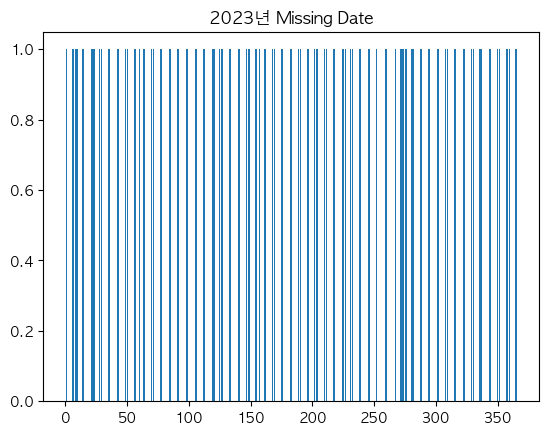

In [41]:
x = list(missing_dt)
y = [1]*len(x)
plt.bar(x,y)
plt.title('2023년 Missing Date')
plt.show()

In [229]:
for dn in ls_missing_dt:
    date = dt.datetime(2023, 1, 1) + dt.timedelta(days=dn)
    print(date.strftime('%Y-%m-%d'))

2023-01-10
2023-01-24
2023-05-02
2023-05-30
2023-10-03
2023-10-10
2023-12-26


In [99]:
every_dates = df_prices_23_apl['DOY'].unique()
len(set(range(1,366)).difference(every_dates))
# 사과: 124일치 누락

124

### ---------------

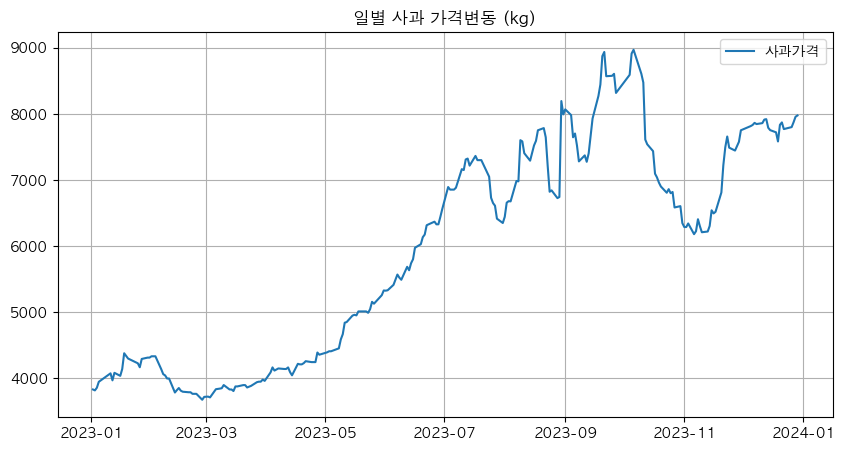

In [158]:
cols_itrs = ['PRCE_REG_YMD','PKG_PRCE']
df_plot = df_prices_23_apl[cols_itrs].groupby('PRCE_REG_YMD').mean()

unqpkg = df_prices_23_apl['WHSL_SMT_UNIT_NM'].unique()
if len(unqpkg) > 1:
    print('- 패키지 개수: ', len(df_prices_23_apl['WHSL_SMT_UNIT_NM'].unique()))
pkg_nm = df_prices_23_apl['WHSL_SMT_UNIT_NM'].unique()[-1]

x = df_plot.index
y = df_plot['PKG_PRCE']

plt.figure(figsize=(10,5))
plt.plot(x, y, label=product)
plt.legend()
plt.title(f'일별 {product} 가격변동 ({pkg_nm})')
plt.grid()
plt.show()

In [234]:
df_prices_23.query('EXMN_SE_NM=="도매"')['PDLT_NM'].unique()

array(['깐마늘(국산)', '느타리버섯', '감귤', '방울토마토', '포도', '양파', '파', '생강', '미나리',
       '깻잎', '피망', '파프리카', '멜론', '피마늘', '팽이버섯', '새송이버섯', '사과', '풋고추', '배',
       '고구마', '단감', '바나나', '감자', '파인애플', '배추', '양배추', '시금치', '상추',
       '얼갈이배추', '수박', '오이', '호박', '토마토', '딸기', '레몬', '망고', '무', '당근',
       '열무', '붉은고추', '쌀', '콩', '팥', '참깨', '들깨', '녹두', '메밀', '찹쌀', '땅콩',
       '고등어', '갈치', '명태', '물오징어', '건멸치', '북어', '건오징어', '김', '건미역', '굴',
       '건고추', '전복', '새우', '참다래', '오렌지', '체리', '참외', '알배기배추', '브로콜리',
       '복숭아', '삼치'], dtype=object)

/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_946/158604512.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices_23_plt['PKG_PRCE'] = df_prices_23_plt['PDLT_PRCE']/df_prices_23_plt['WHSL_SMT_UNIT_MG']


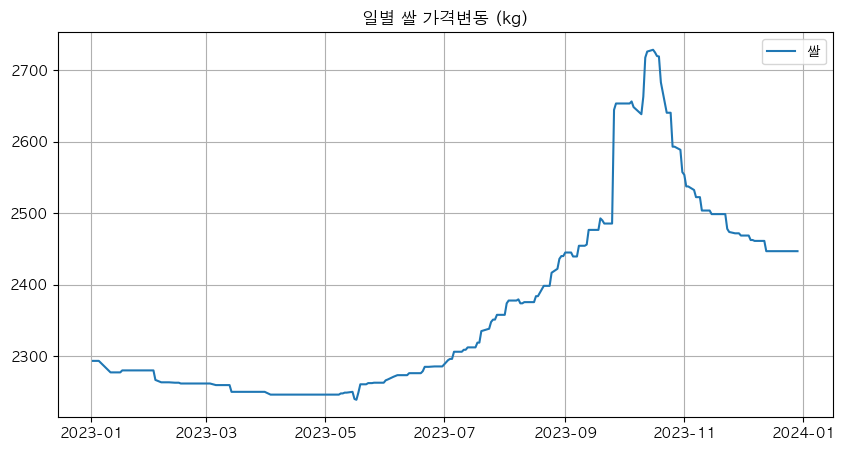

In [220]:
product = '쌀'
df_prices_23_plt = df_prices_23.query(f'PDLT_NM=="{product}" and EXMN_SE_NM=="도매"')

# kg당 가격
df_prices_23_plt['PKG_PRCE'] = df_prices_23_plt['PDLT_PRCE']/df_prices_23_plt['WHSL_SMT_UNIT_MG']

cols_itrs = ['PRCE_REG_YMD','PKG_PRCE']
df_plot = df_prices_23_plt[cols_itrs].groupby('PRCE_REG_YMD').mean()

unqpkg = df_prices_23_plt['WHSL_SMT_UNIT_NM'].unique()
if len(unqpkg) > 1:
    print('- 패키지 개수: ', len(df_prices_23_plt['WHSL_SMT_UNIT_NM'].unique()))
pkg_nm = df_prices_23_plt['WHSL_SMT_UNIT_NM'].unique()[-1]

x = df_plot.index
y = df_plot['PKG_PRCE']

plt.figure(figsize=(10,5))
plt.plot(x, y, label=product)
plt.legend()
plt.title(f'일별 {product} 가격변동 ({pkg_nm})')
plt.grid()
plt.show()

/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_946/4265260396.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices_23_plt['PKG_PRCE'] = df_prices_23_plt['PDLT_PRCE']/df_prices_23_plt['WHSL_SMT_UNIT_MG']
/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_946/4265260396.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices_23_plt['PKG_PRCE'] = df_prices_23_plt['PDLT_PRCE']/df_prices_23_plt['WHSL_SMT_UNIT_MG']
/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_946

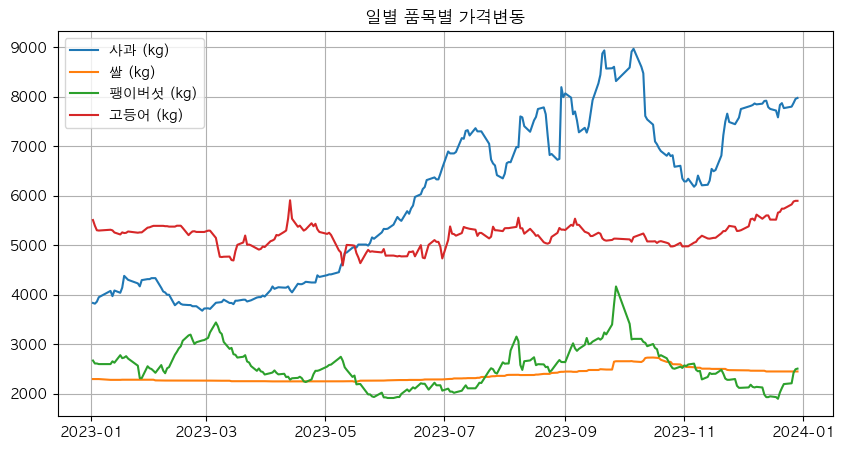

In [252]:
# 프로덕트별
ls_products = ['사과','쌀','팽이버섯','고등어']

# Basic Ploitting
plt.figure(figsize=(10,5))

for product in ls_products:    
    df_prices_23_plt = df_prices_23.query(f'PDLT_NM=="{product}" and EXMN_SE_NM=="도매"')
    
    # 단위당 가격
    df_prices_23_plt['PKG_PRCE'] = df_prices_23_plt['PDLT_PRCE']/df_prices_23_plt['WHSL_SMT_UNIT_MG']

    # 단위명
    unqpkg = list(df_prices_23_plt['WHSL_SMT_UNIT_NM'].unique())
    if len(unqpkg) > 1:
        print(f'- {product} 패키지 개수: ', len(df_prices_23_plt['WHSL_SMT_UNIT_NM'].unique()))
    pkg_nm = df_prices_23_plt['WHSL_SMT_UNIT_NM'].unique()[-1]
    

    cols_itrs = ['PRCE_REG_YMD','PKG_PRCE']
    df_plot = df_prices_23_plt[cols_itrs].groupby('PRCE_REG_YMD').mean()

    # Plotting
    x = df_plot.index
    y = df_plot['PKG_PRCE']
    plt.plot(x, y, label=f'{product} ({pkg_nm})')

plt.title('일별 품목별 가격변동')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 요식업 창업 리포트
# => 일별 변동성
# => 월별 변동성 (계절성)
# => 

In [144]:
# 프로덕트별 / 일별
ls_products = ['사과','쌀','팽이버섯','고등어']

ls_prdcv = []
for product in ls_products:    
    df_prices_23_plt = df_prices_23.query(f'PDLT_NM=="{product}" and EXMN_SE_NM=="도매"')
    df_prices_23_plt['PKG_PRCE'] = df_prices_23_plt['PDLT_PRCE']/df_prices_23_plt['WHSL_SMT_UNIT_MG']

    cols_itrs = ['PRCE_REG_YMD','PKG_PRCE']
    df_updown = df_prices_23_plt[cols_itrs].groupby('PRCE_REG_YMD').mean()


    df_updown['daily_return'] = df_updown['PKG_PRCE'].pct_change()
    std = df_updown['PKG_PRCE'].std()

    # 일일 수익률 변동성
    volatility = df_updown['daily_return'].std()

    # 변동계수
    cv = std / df_updown['PKG_PRCE'].mean()

    ls_prdcv.append([product, cv])

/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_1562/1278593615.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices_23_plt['PKG_PRCE'] = df_prices_23_plt['PDLT_PRCE']/df_prices_23_plt['WHSL_SMT_UNIT_MG']
/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_1562/1278593615.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices_23_plt['PKG_PRCE'] = df_prices_23_plt['PDLT_PRCE']/df_prices_23_plt['WHSL_SMT_UNIT_MG']
/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_156

In [152]:
pd.DataFrame(ls_prdcv, columns=['product','cv'])

,product,cv
0,사과,0.271193
1,쌀,0.054488
2,팽이버섯,0.153350
3,고등어,0.047333


In [161]:
# 도매로 판매되는 전체 프로덕트
set_all_prd = set(df_prices_23.query(f'EXMN_SE_NM=="도매"')['PDLT_NM'])

f1 = df_prices_23['PDLT_NM'].apply(lambda x: x in set_all_prd)
f2 = df_prices_23['EXMN_SE_NM'] == '도매'
df_prices_23_alpd = df_prices_23[f1&f2]

# 단위별 
df_prices_23_alpd['PKG_PRCE'] = df_prices_23_alpd['PDLT_PRCE']/df_prices_23_alpd['WHSL_SMT_UNIT_MG']

cols_itrs = ['PDLT_NM','PRCE_REG_YMD','PKG_PRCE']
df_updown = df_prices_23_alpd[cols_itrs].groupby(['PDLT_NM','PRCE_REG_YMD']).mean()

ls_prdcv = []
for product in set_all_prd:
    df_tmp = df_updown.loc[product]
    df_tmp['daily_return'] = df_tmp['PKG_PRCE'].pct_change()
    
    # 표준편차
    std = df_tmp['PKG_PRCE'].std()
    # 일일 수익률 변동성
    volatility = df_tmp['daily_return'].std()
    # 변동계수
    cv = std / df_tmp['PKG_PRCE'].mean()

    ls_prdcv.append([product, cv])

/var/folders/xj/2s3xtsx155s338l8v9g7k_wh0000gn/T/ipykernel_1562/58671099.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices_23_alpd['PKG_PRCE'] = df_prices_23_alpd['PDLT_PRCE']/df_prices_23_alpd['WHSL_SMT_UNIT_MG']


In [165]:
df_alprdcv = pd.DataFrame(ls_prdcv, columns=['product','cv'])

In [171]:
i = 1
df_alprdcv.sort_values(by='cv', ascending=False).reset_index(drop=True).iloc[60:90]

,product,cv
60,들깨,0.034916
61,명태,0.028038
62,찹쌀,0.026202
63,녹두,0.025588
64,참깨,0.020728
65,건미역,0.019751
66,건오징어,0.019625
67,새우,0.013706
68,콩,0.012902
69,북어,0.010089
